<a href="https://www.kaggle.com/code/jamalahmadmalik/shopping-trends-analysis-covering-200-factors?scriptVersionId=191822329" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import seaborn as sns
import xgboost as xgb
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from plotly.offline import iplot , plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
current_palette = sn.color_palette()
sn.set_palette(current_palette)
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
# decision tree import
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# random forest import
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
# svm import
from sklearn.svm import SVC
from sklearn.svm import SVR
# knn import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
# naive bayes import
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
# import xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
# GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
shop_trnds = pd.read_csv("/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv")
shop_trnds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

# **Data Preprocessing**

In [2]:
shop_trnds.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter           3.10                 Yes   
1          Maine    L     Maroon  Winter           3.10                 Yes   
2  Massachusetts    S     Maroon  Spring           3.10                 Yes   
3   Rhode Island    M     Maroon  Spring           3.50                 Yes   
4         Oregon    M  Turquoise  Spring           2.70                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [3]:
shop_trnds.describe()

Customer ID      Age  Purchase Amount (USD)  Review Rating  \
count     3,900.00 3,900.00               3,900.00       3,900.00   
mean      1,950.50    44.07                  59.76           3.75   
std       1,125.98    15.21                  23.69           0.72   
min           1.00    18.00                  20.00           2.50   
25%         975.75    31.00                  39.00           3.10   
50%       1,950.50    44.00                  60.00           3.70   
75%       2,925.25    57.00                  81.00           4.40   
max       3,900.00    70.00                 100.00           5.00   

       Previous Purchases  
count            3,900.00  
mean                25.35  
std                 14.45  
min                  1.00  
25%                 13.00  
50%                 25.00  
75%                 38.00  
max                 50.00

In [4]:
shop_trnds.shape

(3900, 18)

In [5]:
shop_trnds.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [6]:
shop_trnds.duplicated().sum()

0

In [7]:
shop_trnds.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
shop_trnds.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [9]:
shop_trnds.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

# **Inventory Analysis**

**Total Selling Items**

In [10]:
tot_items_in_store = shop_trnds["Item Purchased"].unique().size
print(f'There are {tot_items_in_store} items in the store')

There are 25 items in the store


**Total Categories**

In [11]:
tot_cats_in_store = shop_trnds["Category"].unique().size
print(f'There are {tot_cats_in_store} categories in the store')

There are 4 categories in the store


**Sizes Available**

In [12]:
tot_sizes_in_store = shop_trnds["Size"].unique().size
print(f'There are {tot_sizes_in_store} available sizes in the store')

There are 4 available sizes in the store


**Colors Available**

In [13]:
tot_colors_in_store = shop_trnds["Color"].unique().size
print(f'There are {tot_colors_in_store} available colors in the store')

There are 25 available colors in the store


# **Store Statistics**

**Customers Count**

In [14]:
tot_customers = shop_trnds["Customer ID"].unique().size
print(f'There are {tot_customers} customers in the store')

There are 3900 customers in the store


**Customers vs Locations**

In [15]:
tot_locations = shop_trnds["Location"].unique().size
print(f'There are total {tot_customers} customers from {tot_locations} different states of United States in the store')

There are total 3900 customers from 50 different states of United States in the store


**Most No. of Sales from Top 5 states**

Most No. of Sales from Top 5 states Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Name: count, dtype: int64


<Axes: title={'center': 'Most No. of Sales by Top 5 States'}, xlabel='Location'>

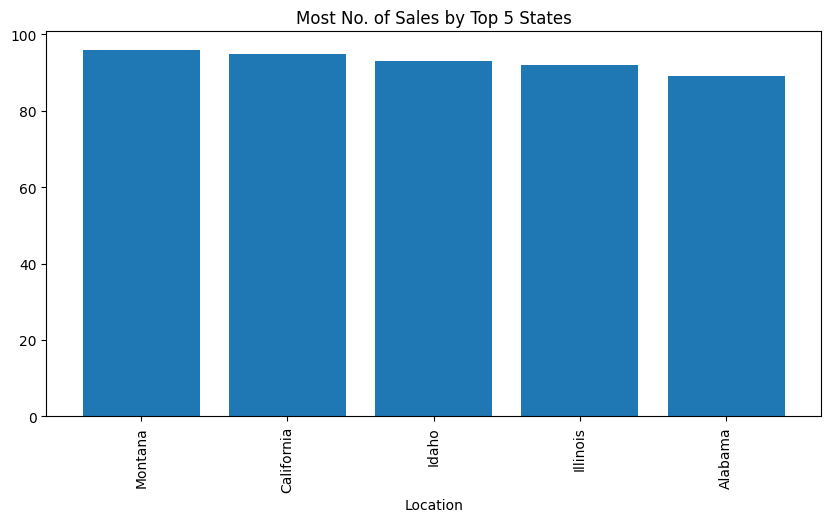

In [16]:
sales_by_most_common_locations = shop_trnds["Location"].value_counts().head(5)
print(f'Most No. of Sales from Top 5 states {sales_by_most_common_locations}')
sales_by_most_common_locations.plot(kind='bar', figsize=(10, 5), width=0.8, title='Most No. of Sales by Top 5 States') #Most Common Locations

**Least No. of purchases from 5 states**

Least No. of purchases from 5 states Location
Kansas          63
Rhode Island    63
Hawaii          65
Arizona         65
New Jersey      67
Name: count, dtype: int64


<Axes: title={'center': 'Least No. of Sales by State'}, xlabel='Location'>

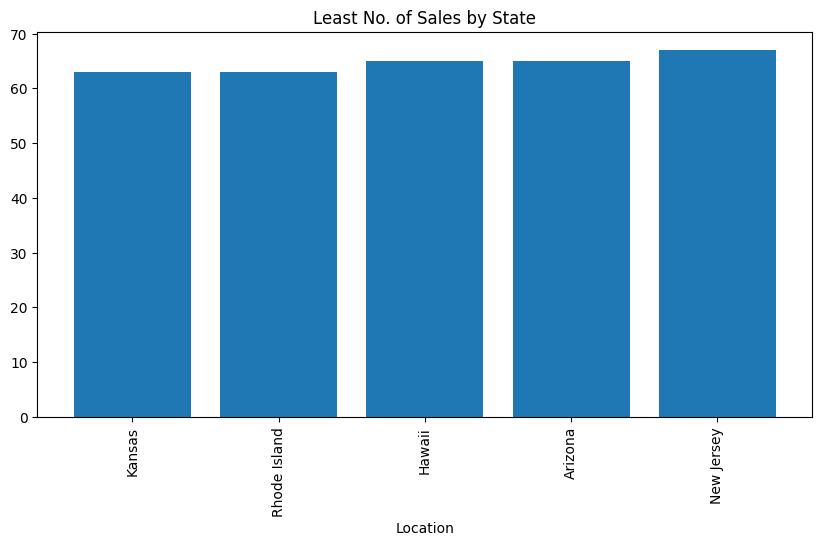

In [17]:
sales_by_least_common_locations = shop_trnds["Location"].value_counts().tail(5).sort_values(ascending=True)
print(f'Least No. of purchases from 5 states {sales_by_least_common_locations}')
sales_by_least_common_locations.plot(kind='bar', figsize=(10, 5), width=0.8, title='Least No. of Sales by State') #Least Common Locations

**Total Store Revenue**

In [18]:
tot_revenue = shop_trnds["Purchase Amount (USD)"].sum()
print(f'Total Store Revenue is US$ {tot_revenue:.2f}') #Total Revenue

Total Store Revenue is US$ 233081.00


**Minimum order amount**

In [19]:
min_order_amount = shop_trnds["Purchase Amount (USD)"].min()
print(f'Minimum order amount was US$ {min_order_amount:.2f}') #Min Order Value

Minimum order amount was US$ 20.00


**Maximum order amount**

In [20]:
max_order_amount = shop_trnds["Purchase Amount (USD)"].max()
print(f'Maximum order amount was US$ {max_order_amount:.2f}') #Max Order Value

Maximum order amount was US$ 100.00


Average order amount

In [21]:
average_sale_value = shop_trnds["Purchase Amount (USD)"].mean()
print(f'Average order amount was US$ {average_sale_value:.2f}') #Average Sale Value

Average order amount was US$ 59.76


**Median order amount**

In [22]:
common_sale_value = shop_trnds["Purchase Amount (USD)"].median()
print(f'Median order amount was US$ {common_sale_value:.2f}') #Median Sale Value

Median order amount was US$ 60.00


**Average age of customers**

In [23]:
average_age_of_customers = shop_trnds["Age"].mean().round().astype(int)
print(f'Average age of customers is {average_age_of_customers}') #Average Age

Average age of customers is 44


# **Review & Rating Analysis**

**Average review rating given by customers**

In [24]:
average_review_rating = shop_trnds["Review Rating"].mean().round(2)
print(f'Average review rating given by customers is {average_review_rating}') #Average Review Rating

Average review rating given by customers is 3.75


Total 5***** Ratings given by Customers

In [25]:
fivestar_reviews = shop_trnds["Review Rating"].value_counts()[5]
print(f'There are {fivestar_reviews} customers who rated 5***** reviews') #Positive Reviews

There are 68 customers who rated 5***** reviews


4**** Ratings Analysis

There are 1576 customers who rated 4.0 to 4.9 reviews
There are Review Rating
4.00    181
4.10    148
4.20    171
4.30    147
4.40    158
4.50    139
4.60    174
4.70    148
4.80    144
4.90    166
Name: count, dtype: int64 customers who rated 4**** reviews


<Axes: title={'center': '4**** Customers Rating'}, xlabel='Review Rating'>

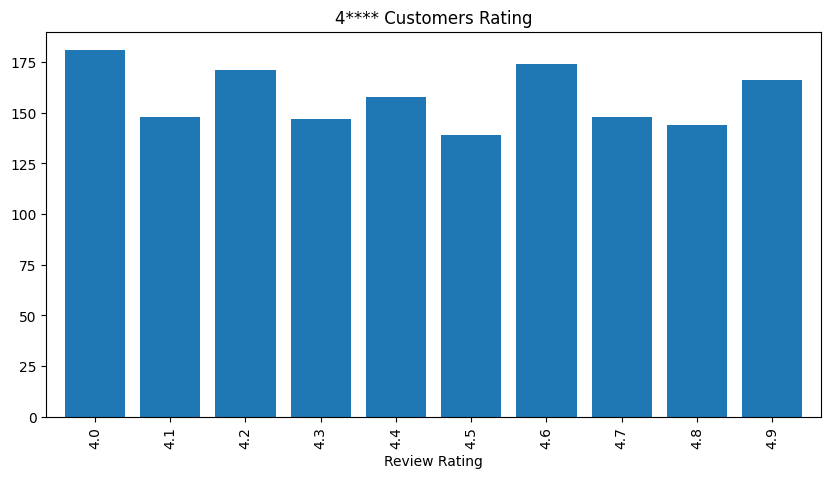

In [26]:
finf = [4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]
fourstar_reviews = shop_trnds['Review Rating'].value_counts()[finf]
fourstar_reviews_sum = fourstar_reviews.sum()
print(f'There are {fourstar_reviews_sum} customers who rated 4.0 to 4.9 reviews') #Positive Reviews
print(f'There are {fourstar_reviews} customers who rated 4**** reviews') #Positive Reviews
fourstar_reviews.plot(kind='bar', figsize=(10, 5), width=0.8, title='4**** Customers Rating')

3*** Ratings Analysis

There are 1571 customers who rated 3.0 to 3.9 reviews
There are Review Rating
3.00    162
3.10    157
3.20    152
3.30    152
3.40    182
3.50    156
3.60    149
3.70    156
3.80    142
3.90    163
Name: count, dtype: int64 customers who rated 3**** reviews


<Axes: title={'center': '3*** Customers Rating'}, xlabel='Review Rating'>

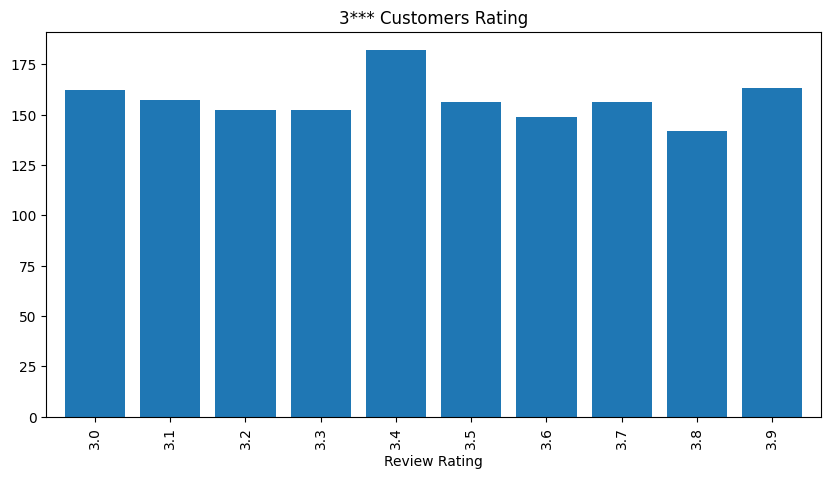

In [27]:
fint = [3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9]
threestar_reviews = shop_trnds['Review Rating'].value_counts()[fint]
threestar_reviews_sum = threestar_reviews.sum()
print(f'There are {threestar_reviews_sum} customers who rated 3.0 to 3.9 reviews') #Neutral Reviews
print(f'There are {threestar_reviews} customers who rated 3**** reviews') #Neutral Reviews
threestar_reviews.plot(kind='bar', figsize=(10, 5), width=0.8, title='3*** Customers Rating')

2** Ratings Analysis

There are 685 customers who rated 2.0 to 2.9 reviews
There are Review Rating
2.50     66
2.60    159
2.70    154
2.80    136
2.90    170
Name: count, dtype: int64 customers who rated 2** reviews


<Axes: title={'center': '2** Customers Rating'}, xlabel='Review Rating'>

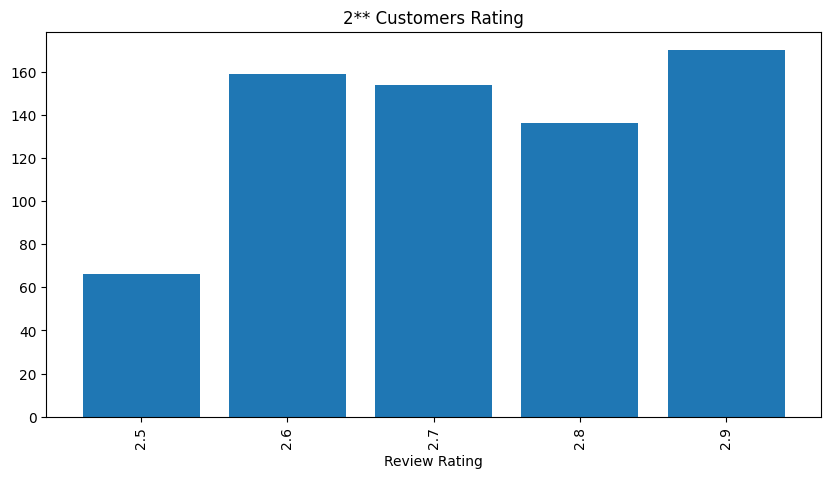

In [28]:
fintwo = [2.5, 2.6, 2.7, 2.8, 2.9]
twostar_reviews = shop_trnds['Review Rating'].value_counts()[fintwo]
twostar_reviews_sum = twostar_reviews.sum()
print(f'There are {twostar_reviews_sum} customers who rated 2.0 to 2.9 reviews') #Negative Reviews
print(f'There are {twostar_reviews} customers who rated 2** reviews') #Negative Reviews
twostar_reviews.plot(kind='bar', figsize=(10, 5), width=0.8, title='2** Customers Rating')


10 Bad Performing Items With Negative Ratings

Top 10 items with negative ratings are Item Purchased
Shirt      39
Coat       35
Pants      34
Shorts     33
Scarf      33
Sweater    31
Sandals    31
Jewelry    28
Blouse     28
Socks      28
Name: Review Rating, dtype: int64


<Axes: title={'center': '10 bad performing items with negative ratings'}, xlabel='Item Purchased'>

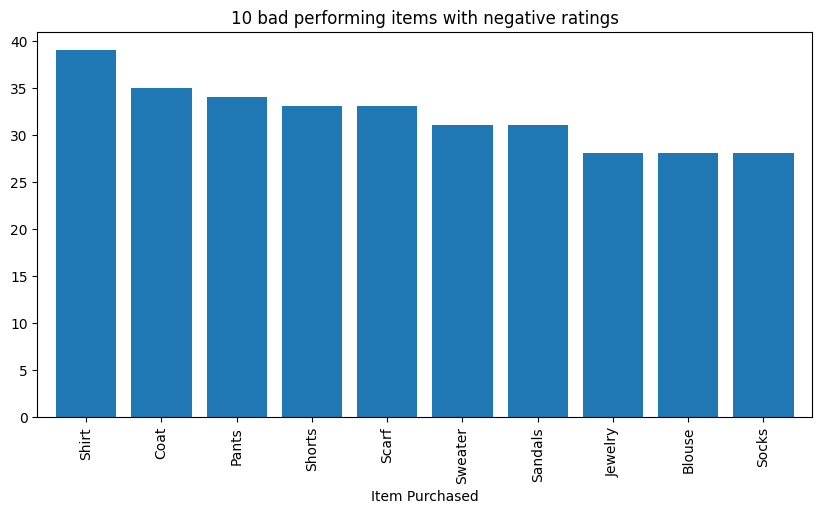

In [29]:
fnegarr = [2.5, 2.6, 2.7, 2.8, 2.9]
top_10_item_names_with_negative_ratings = shop_trnds[shop_trnds['Review Rating'].isin(fnegarr)].groupby('Item Purchased')['Review Rating'].count().sort_values(ascending=False).head(10)
print(f'Top 10 items with negative ratings are {top_10_item_names_with_negative_ratings}')
top_10_item_names_with_negative_ratings.plot(kind='bar', figsize=(10, 5), width=0.8, title='10 bad performing items with negative ratings')


10 Well Performing Items With Positive Ratings

Top 10 items with positive ratings are Item Purchased
Sandals    80
Jewelry    74
Jacket     73
Hat        71
Sweater    70
Belt       70
Boots      69
Blouse     68
Coat       68
Skirt      68
Name: Review Rating, dtype: int64


<Axes: title={'center': '10 best performing items with positive ratings'}, xlabel='Item Purchased'>

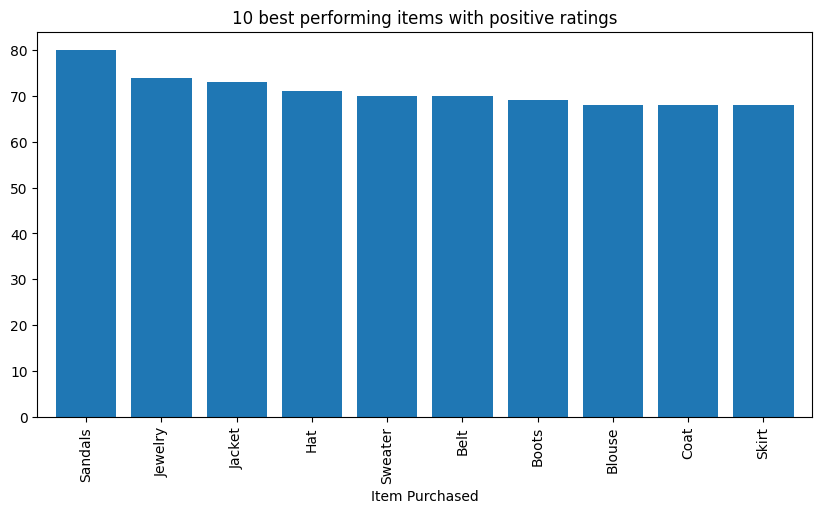

In [30]:
fnegarrs = [5, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]
top_10_item_names_with_positive_ratings = shop_trnds[shop_trnds['Review Rating'].isin(fnegarrs)].groupby('Item Purchased')['Review Rating'].count().sort_values(ascending=False).head(10)
print(f'Top 10 items with positive ratings are {top_10_item_names_with_positive_ratings}')
top_10_item_names_with_positive_ratings.plot(kind='bar', figsize=(10, 5), width=0.8, title='10 best performing items with positive ratings')


# **Payment Methods Analysis**

**Available Payment Methods**

There are 6 payment methods in the store


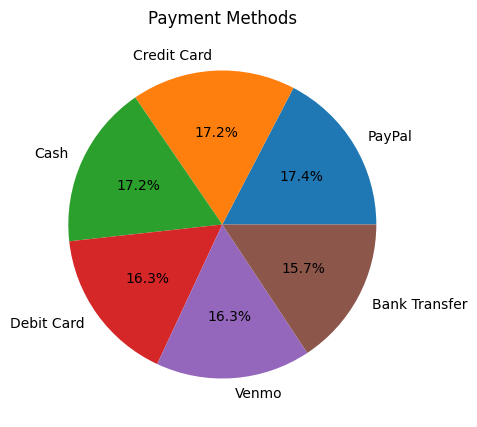

In [31]:
tot_payment_methods = shop_trnds["Payment Method"].unique().size
print(f'There are {tot_payment_methods} payment methods in the store')
plt.figure(figsize=(10, 5))
plt.pie(shop_trnds["Payment Method"].value_counts(), labels=shop_trnds["Payment Method"].value_counts().index, autopct='%1.1f%%')
plt.title('Payment Methods')
plt.show()

**Payment Methods Used By Each State**

In [32]:
payment_methods_used_by_state = shop_trnds.groupby(["Location", "Payment Method"])["Payment Method"].count()
print(payment_methods_used_by_state)

Location  Payment Method
Alabama   Bank Transfer     10
          Cash               8
          Credit Card       17
          Debit Card        20
          PayPal            19
                            ..
Wyoming   Cash              10
          Credit Card       17
          Debit Card        20
          PayPal             6
          Venmo             11
Name: Payment Method, Length: 300, dtype: int64


**Payment Method vs Category Count**

Payment Method  Bank Transfer  Cash  Credit Card  Debit Card  PayPal  Venmo
Category                                                                   
Accessories               180   214          218         195     232    201
Clothing                  285   301          306         293     282    270
Footwear                   92   104           93          99     103    108
Outerwear                  55    51           54          49      60     55


<Axes: title={'center': 'Payment Methods by Category'}, xlabel='Category'>

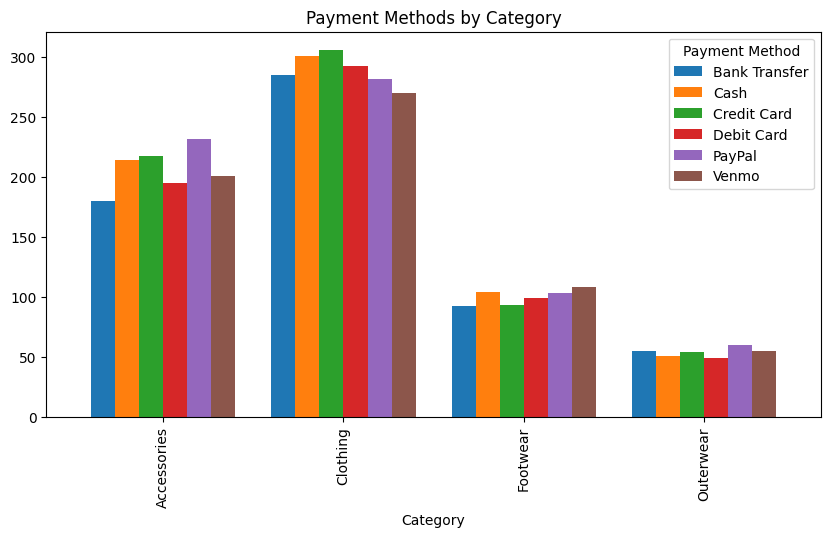

In [33]:
payment_method_used_by_category = shop_trnds.groupby(["Category", "Payment Method"])["Payment Method"].count()
data = payment_method_used_by_category.unstack()
print(data)
data.plot(kind='bar', figsize=(10, 5), width=0.8, title='Payment Methods by Category')

# **Shipping Method Analysis**

**Available Shipping Methods**

There are 6 shipping methods in the store
Shipping Type
2-Day Shipping    627
Express           646
Free Shipping     675
Next Day Air      648
Standard          654
Store Pickup      650
Name: Shipping Type, dtype: int64


Text(0.5, 1.0, 'Shipping Methods')

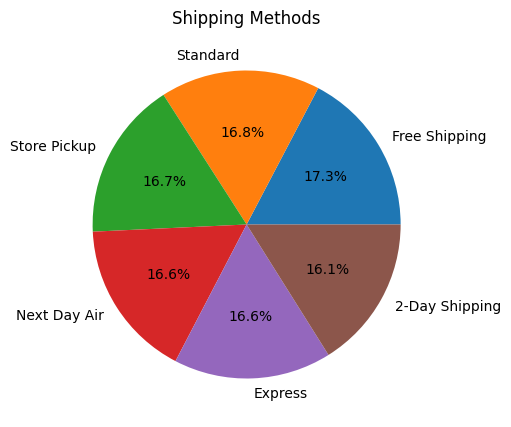

In [34]:
tot_shipping_methods = shop_trnds["Shipping Type"].unique().size
print(f'There are {tot_shipping_methods} shipping methods in the store')
ship_data = shop_trnds.groupby(["Shipping Type"])["Shipping Type"].count()
print(ship_data)
plt.figure(figsize=(10, 5))
plt.pie(shop_trnds["Shipping Type"].value_counts(), labels=shop_trnds["Shipping Type"].value_counts().index, autopct='%1.1f%%')
plt.title('Shipping Methods')

**Sales By Shipping Type vs Category**

Shipping Type  2-Day Shipping  Express  Free Shipping  Next Day Air  Standard  \
Category                                                                        
Accessories               206      203            195           211       208   
Clothing                  281      290            294           293       297   
Footwear                   90       96            122            93       100   
Outerwear                  50       57             64            51        49   

Shipping Type  Store Pickup  
Category                     
Accessories             217  
Clothing                282  
Footwear                 98  
Outerwear                53  


<Axes: title={'center': 'Shipping Methods by Category'}, xlabel='Category'>

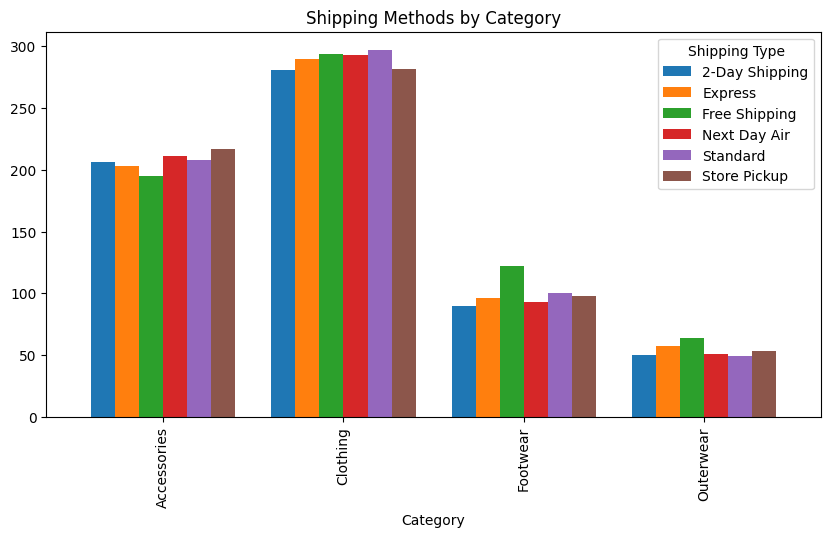

In [35]:
tot_shipping_methods_by_category = shop_trnds.groupby(["Category", "Shipping Type"])["Shipping Type"].count()
tot_shipping_methods_by_category = tot_shipping_methods_by_category.unstack()
print(tot_shipping_methods_by_category)
tot_shipping_methods_by_category.plot(kind='bar', figsize=(10, 5), width=0.8, title='Shipping Methods by Category')


**Revenue By Shipping Type vs Category**

Shipping Type
Free Shipping     40777
Express           39067
Store Pickup      38931
Standard          38233
2-Day Shipping    38080
Next Day Air      37993
Name: Purchase Amount (USD), dtype: int64


<Axes: title={'center': 'Total Revenue by Shipping Method'}, xlabel='Shipping Type'>

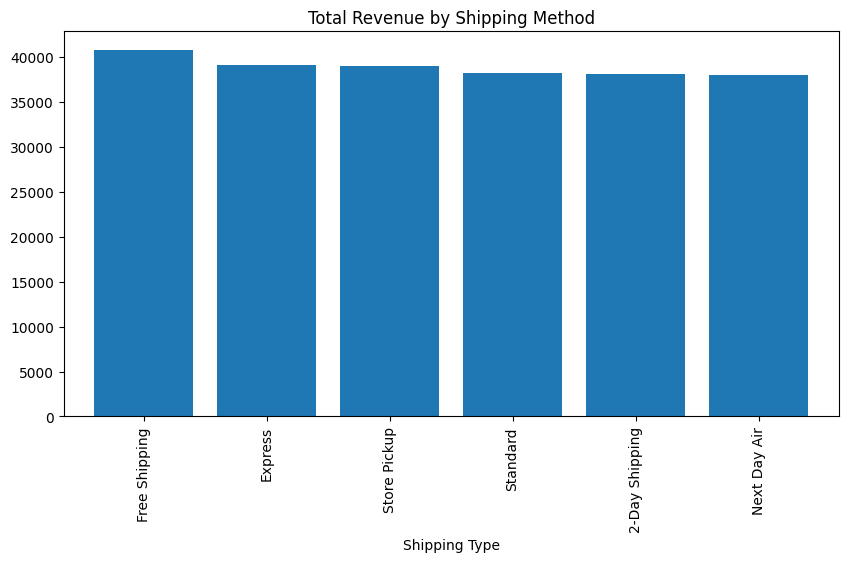

In [36]:
tot_revenue_by_shipping_method = shop_trnds.groupby(["Shipping Type"])["Purchase Amount (USD)"].sum().sort_values(ascending=False)
print(tot_revenue_by_shipping_method)
tot_revenue_by_shipping_method.plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Shipping Method')

**Sales By Shipping Type vs Location**

Shipping Type   2-Day Shipping  Express  Free Shipping  Next Day Air  \
Location                                                               
Alabama                     16       20              9            17   
Alaska                      13       13             14             8   
Arizona                     10       12             10            11   
Arkansas                    12       16             14            17   
California                  14       16             16            20   
Colorado                    12        4             13            14   
Connecticut                 16       11              6            18   
Delaware                    14       14             20            16   
Florida                     10       14             17             8   
Georgia                     13       13             18             9   
Hawaii                       7       13             10            11   
Idaho                       15       14             16          

<Axes: title={'center': 'Shipping Methods by Location'}, xlabel='Location'>

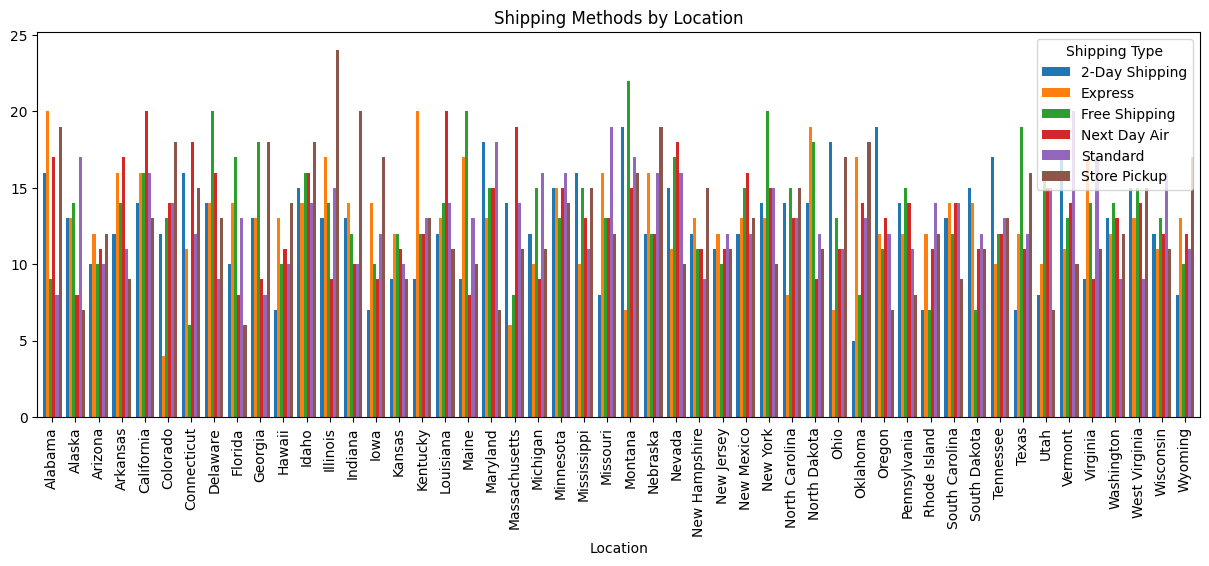

In [37]:
shipping_method_by_location_count = shop_trnds.groupby(["Location", "Shipping Type"])["Shipping Type"].count()
shipping_method_by_location_count = shipping_method_by_location_count.unstack()
print(shipping_method_by_location_count)
shipping_method_by_location_count.plot(kind='bar', figsize=(15, 5), width=0.8, title='Shipping Methods by Location')

**Sales By Shipping Type vs Items Ordered**

Shipping Type   2-Day Shipping  Express  Free Shipping  Next Day Air  \
Item Purchased                                                         
Backpack                    25       26             16            27   
Belt                        30       25             29            25   
Blouse                      26       27             29            31   
Boots                       25       17             28            25   
Coat                        23       32             23            28   
Dress                       31       23             30            32   
Gloves                      19       29             25            27   
Handbag                     28       23             20            27   
Hat                         29       31             25            21   
Hoodie                      25       31             27            22   
Jacket                      27       25             41            23   
Jeans                       18       24             19          

<Axes: title={'center': 'Shipping Methods by Item Purchased'}, xlabel='Item Purchased'>

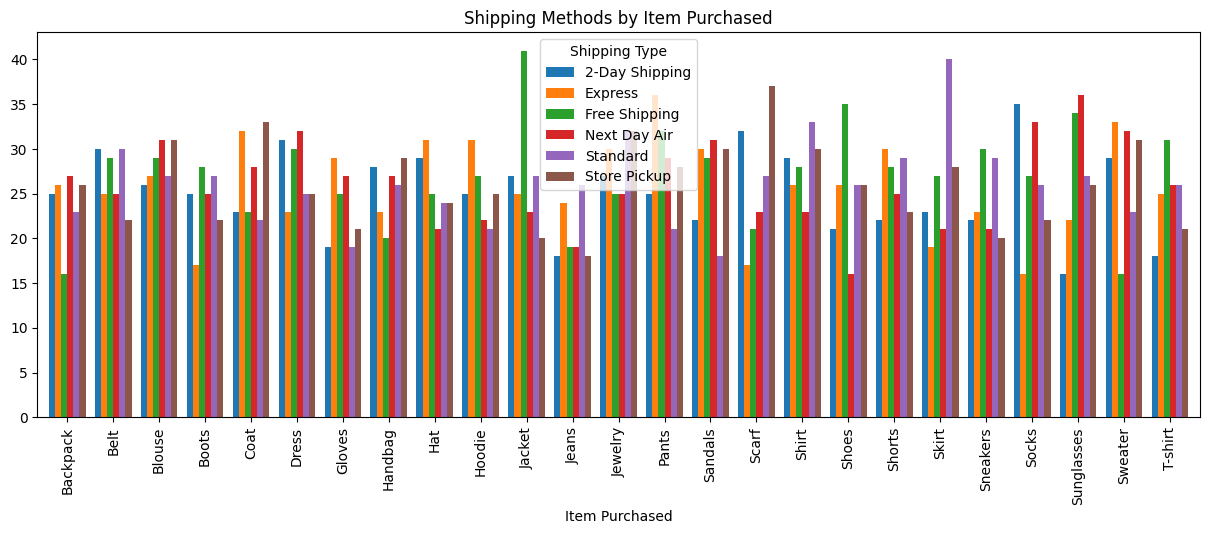

In [38]:
ship_method_by_item_purchased_count = shop_trnds.groupby(["Item Purchased", "Shipping Type"])["Shipping Type"].count()
ship_method_by_item_purchased_count = ship_method_by_item_purchased_count.unstack()
print(ship_method_by_item_purchased_count)
ship_method_by_item_purchased_count.plot(kind='bar', figsize=(15, 5), width=0.8, title='Shipping Methods by Item Purchased')

**Shipping Type vs Average Review Rating**

Shipping Type
Standard         3.82
Express          3.78
2-Day Shipping   3.76
Next Day Air     3.72
Free Shipping    3.72
Store Pickup     3.71
Name: Review Rating, dtype: float64


<Axes: title={'center': 'Average Review Rating by Shipping Method'}, xlabel='Shipping Type'>

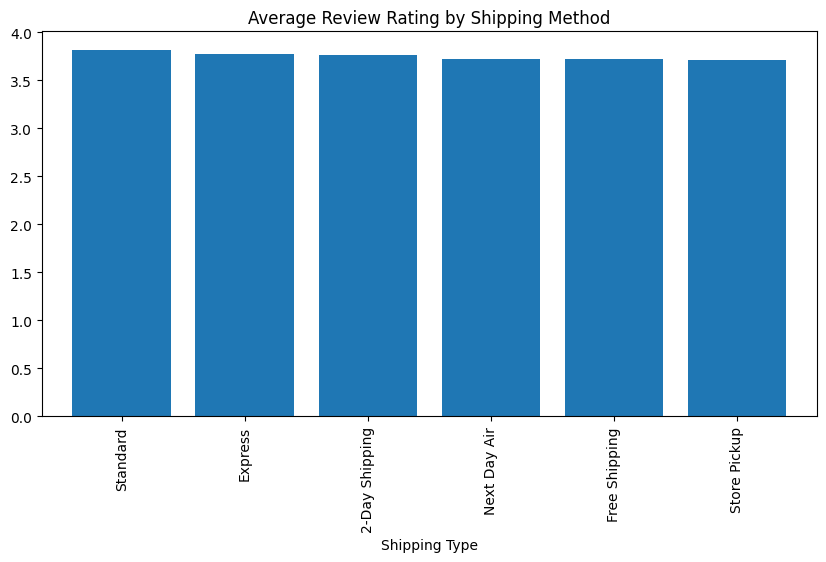

In [39]:
ship_method_average_review_rating = shop_trnds.groupby(["Shipping Type"])["Review Rating"].mean().sort_values(ascending=False)
print(ship_method_average_review_rating)
ship_method_average_review_rating.plot(kind='bar', figsize=(10, 5), width=0.8, title='Average Review Rating by Shipping Method')

**Sales By Shipping Type vs FOP**

Frequency of Purchases  Annually  Bi-Weekly  Every 3 Months  Fortnightly  \
Shipping Type                                                              
2-Day Shipping                84         87              97           89   
Express                       96        100              99           88   
Free Shipping                112         82             101           79   
Next Day Air                  81         99             109           86   
Standard                     107         89              75          107   
Store Pickup                  92         90             103           93   

Frequency of Purchases  Monthly  Quarterly  Weekly  
Shipping Type                                       
2-Day Shipping               95         93      82  
Express                      84         85      94  
Free Shipping                90        101     110  
Next Day Air                102         87      84  
Standard                     91         98      87  
Store Pickup        

<Axes: title={'center': 'Shipping Type vs Frequency of Purchase'}, xlabel='Shipping Type'>

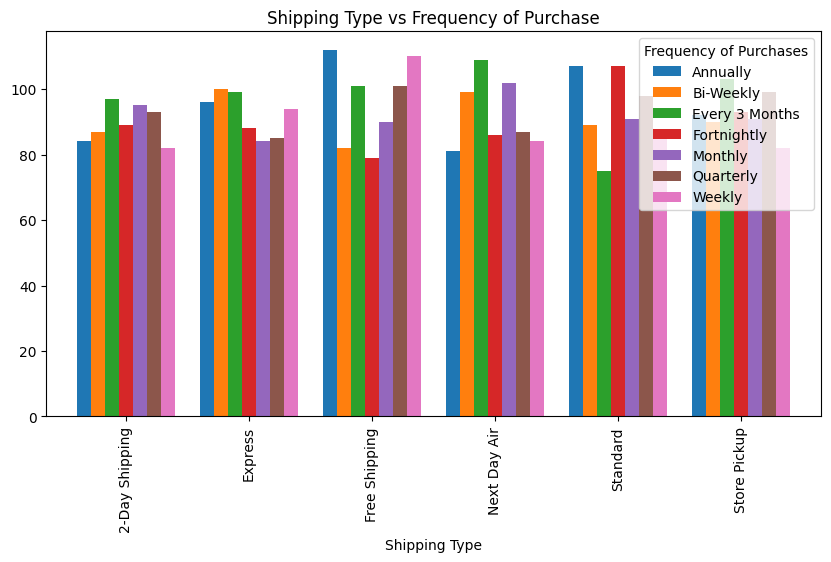

In [40]:
ship_method_frequency_of_purchase_count = shop_trnds.groupby(["Shipping Type", "Frequency of Purchases"])["Frequency of Purchases"].count().sort_values(ascending=False)
ship_method_frequency_of_purchase_count = ship_method_frequency_of_purchase_count.unstack()
print(ship_method_frequency_of_purchase_count)
ship_method_frequency_of_purchase_count.plot(kind='bar', figsize=(10, 5), width=0.8, title='Shipping Type vs Frequency of Purchase')

**Shipping Type vs Previous Purchases**

Shipping Type
Next Day Air      16052
Store Pickup      16122
2-Day Shipping    16368
Express           16471
Free Shipping     16702
Standard          17156
Name: Previous Purchases, dtype: int64


<Axes: title={'center': 'Shipping Type vs Sum of Previous Purchases'}, xlabel='Shipping Type'>

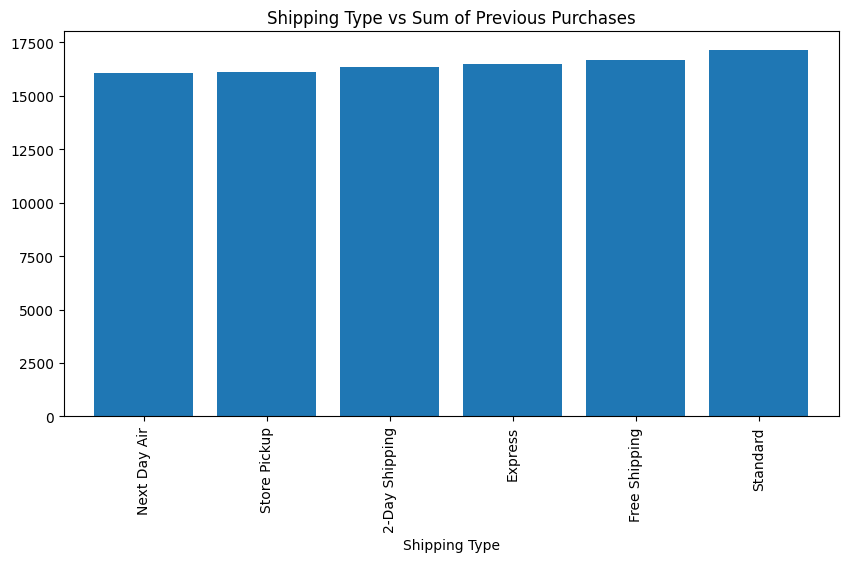

In [41]:
ship_method_vs_sum_prev_purchases = shop_trnds.groupby(["Shipping Type"])["Previous Purchases"].sum().sort_values(ascending=True)
print(ship_method_vs_sum_prev_purchases)
ship_method_vs_sum_prev_purchases.plot(kind='bar', figsize=(10, 5), width=0.8, title='Shipping Type vs Sum of Previous Purchases')


# **Activity By Gender**

**Purhase % By Gender**

        Count  Percentage
Gender                   
Male     2652       68.00
Female   1248       32.00


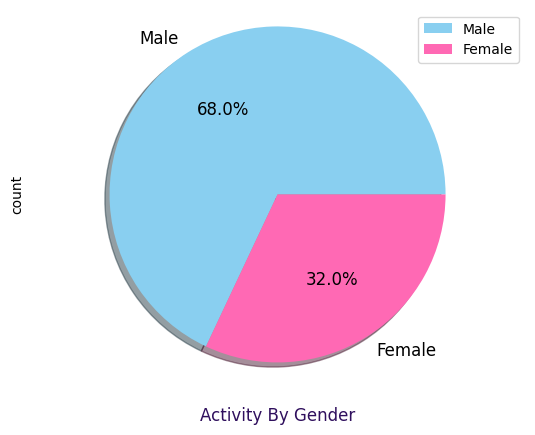

In [42]:
    colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
        "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
        "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

    counts = shop_trnds["Gender"].value_counts()
    counts_percentage =shop_trnds['Gender'].value_counts(normalize=True)*100
    ncounts = pd.DataFrame({'Count': counts, 'Percentage': counts_percentage})
    print(ncounts)
    myexplode = [0.2, 0, 0, 0]
    counts.plot(kind = 'pie', fontsize = 12, colors = colors,  shadow = True, autopct = '%1.1f%%', subplots=True)
    plt.xlabel('Activity By Gender', color = "#2F0F5D", fontsize = 12, labelpad = 20)
    plt.axis('equal')
    plt.legend(labels = counts.index, loc = "best")
    plt.show()


**Average age of the gender who purchased items**

In [43]:
# Average age of the people who purchased items
df = shop_trnds
df_Gender_age = df.groupby('Gender')['Age'].mean()
iplot(px.pie(values=df_Gender_age,
             names=['Female','Male'],
             title='Average age of people who purchased items',
             template='plotly_dark'
             ).update_traces(textinfo='label+percent+value'))

**Revenue By Gender vs Category**

Category  Accessories  Clothing  Footwear  Outerwear
Gender                                              
Female          23819     33636     11835       5901
Male            50381     70628     24258      12623


<Axes: title={'center': 'Revenue By Gender Vs Category'}, xlabel='Gender'>

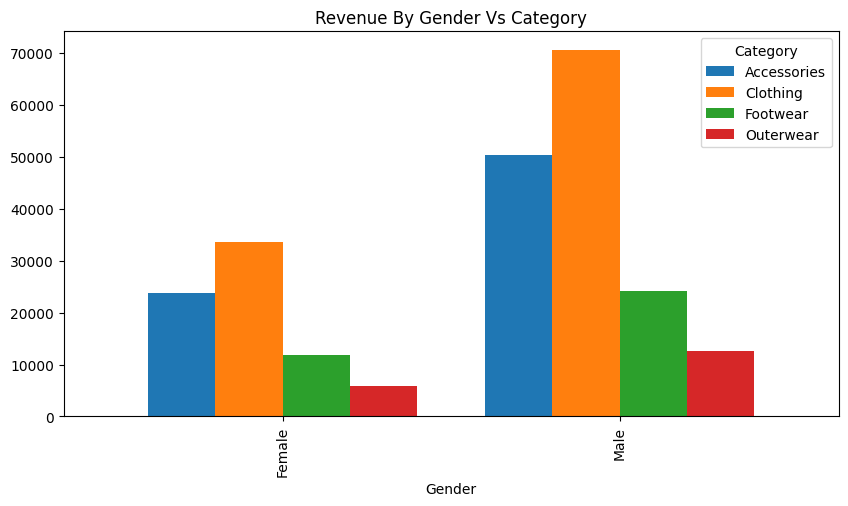

In [44]:
gender_cat_amount = shop_trnds.groupby(["Gender", "Category"])["Purchase Amount (USD)"].sum()
gender_cat_amounts = gender_cat_amount.unstack()
print(gender_cat_amounts)
gender_cat_amounts.plot(kind='bar', figsize=(10, 5), width=0.8, title='Revenue By Gender Vs Category')


**Revenue By Gender vs Payment Method**

Payment Method  Bank Transfer   Cash  Credit Card  Debit Card  PayPal  Venmo
Gender                                                                      
Female                  12174  12437        13350       11309   13524  12397
Male                    24370  27565        26960       27433   26585  24977


<Axes: title={'center': 'Revenue By Gender Vs Payment Method'}, xlabel='Gender'>

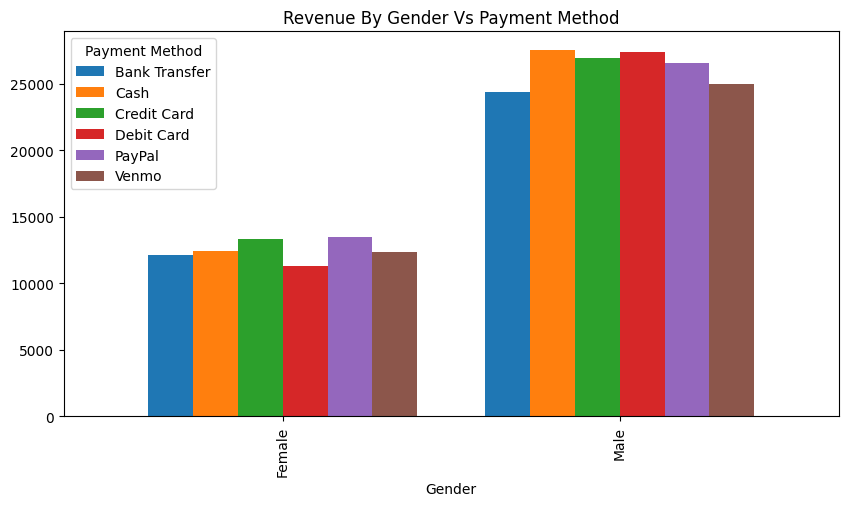

In [45]:
gender_pm_amount = shop_trnds.groupby(["Gender", "Payment Method"])["Purchase Amount (USD)"].sum()
gender_pm_amounts = gender_pm_amount.unstack()
print(gender_pm_amounts)
gender_pm_amounts.plot(kind='bar', figsize=(10, 5), width=0.8, title='Revenue By Gender Vs Payment Method')

**Revenue By Gender vs Season**

Season   Fall  Spring  Summer  Winter
Gender                               
Female  20193   18578   18060   18360
Male    39825   40101   37717   40247


<Axes: title={'center': 'Revenue By Gender Vs Season'}, xlabel='Gender'>

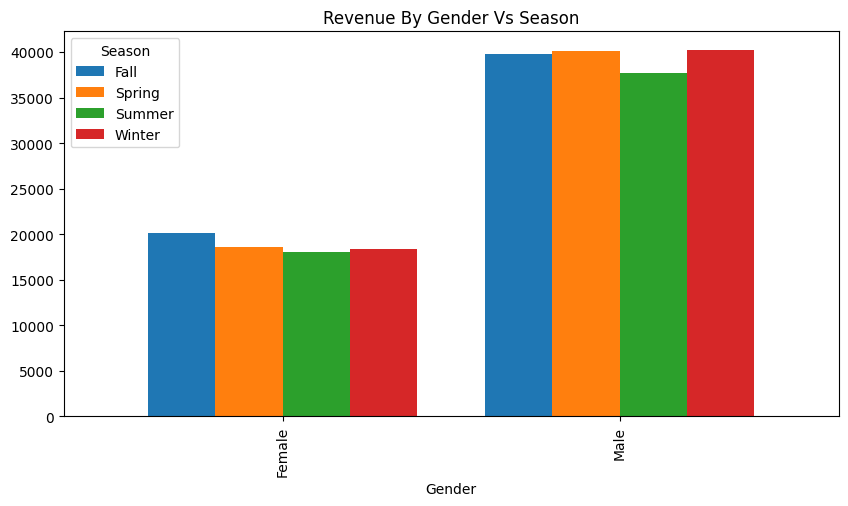

In [46]:
gender_season_amount = shop_trnds.groupby(["Gender", "Season"])["Purchase Amount (USD)"].sum()
gender_season_amounts = gender_season_amount.unstack()
print(gender_season_amounts)
gender_season_amounts.plot(kind='bar', figsize=(10, 5), width=0.8, title='Revenue By Gender Vs Season')

**Revenue By Gender vs Location**

Location  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
Gender                                                               
Female       1678    1730     1658      1741        1736      1527   
Male         3583    3137     2668      3087        3869      2695   

Location  Connecticut  Delaware  Florida  Georgia  ...  South Dakota  \
Gender                                             ...                 
Female           1615      1271     1036     1773  ...          1325   
Male             2611      3487     2762     2872  ...          2911   

Location  Tennessee  Texas  Utah  Vermont  Virginia  Washington  \
Gender                                                            
Female         1695   2059  1809     1362      1617        1494   
Male           3077   2653  2634     3498      3225        3129   

Location  West Virginia  Wisconsin  Wyoming  
Gender                                       
Female             1239       1335     1071  
Male               3935

<Axes: title={'center': 'Revenue By Gender Vs Location'}, xlabel='Gender'>

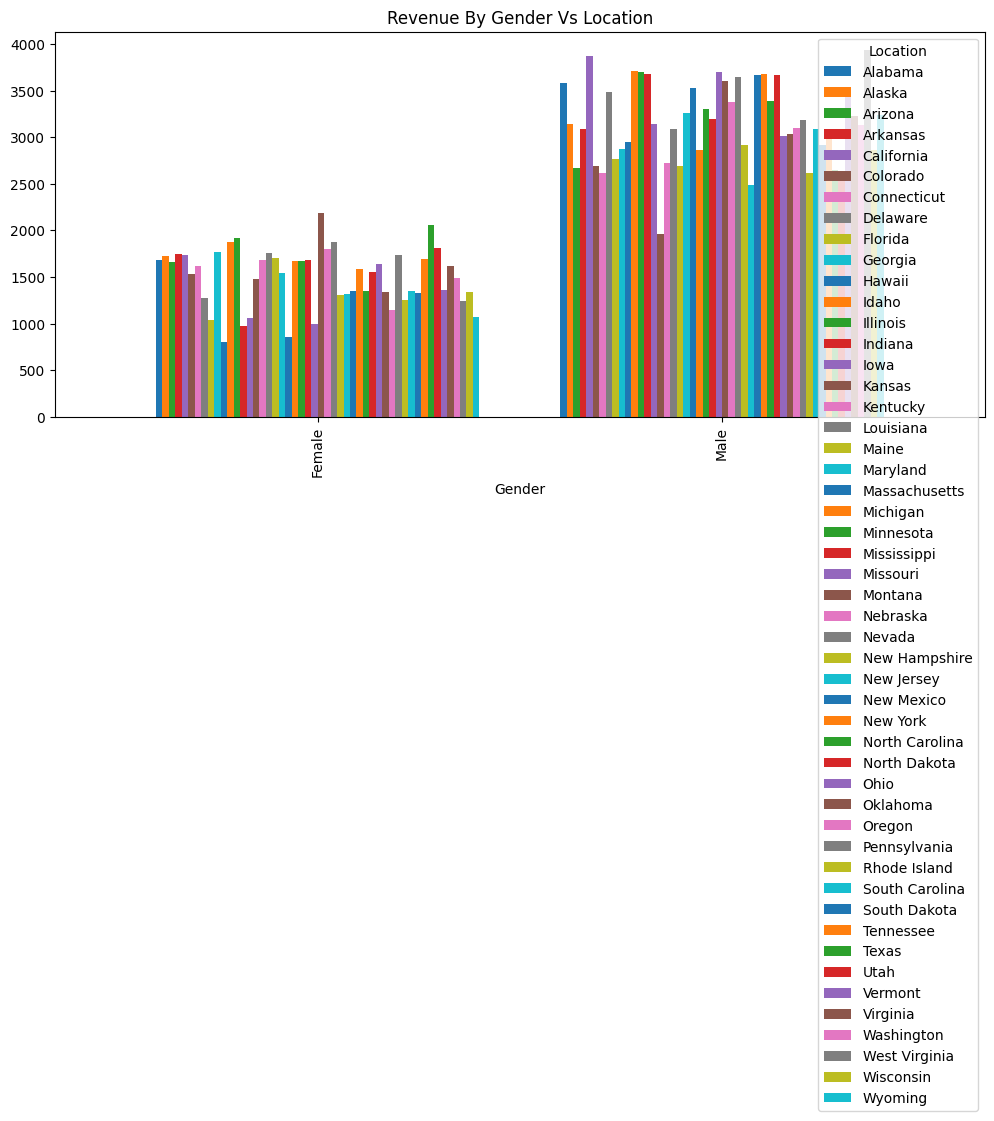

In [47]:
gender_location_amount = shop_trnds.groupby(["Gender", "Location"])["Purchase Amount (USD)"].sum()
gender_location_amounts = gender_location_amount.unstack()
print(gender_location_amounts)
gender_location_amounts.plot(kind='bar', figsize=(12, 5), width=0.8, title='Revenue By Gender Vs Location')

**Revenue By Gender vs Shipping Type**

Shipping Type  2-Day Shipping  Express  Free Shipping  Next Day Air  Standard  \
Gender                                                                          
Female                  12288    11739          15222         11627     12429   
Male                    25792    27328          25555         26366     25804   

Shipping Type  Store Pickup  
Gender                       
Female                11886  
Male                  27045  


<Axes: title={'center': 'Revenue By Gender Vs Shipping Method'}, xlabel='Gender'>

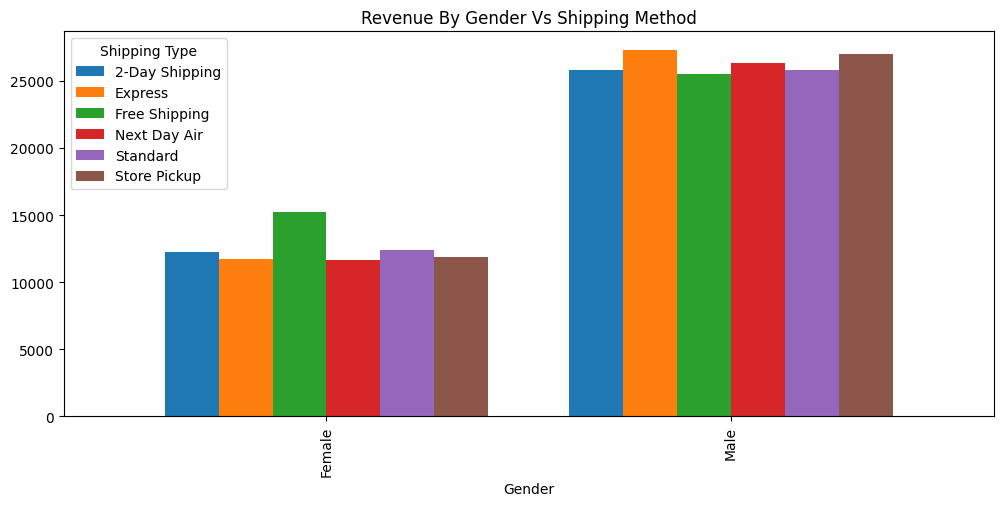

In [48]:
gender_ship_method_amount = shop_trnds.groupby(["Gender", "Shipping Type"])["Purchase Amount (USD)"].sum()
gender_ship_method_amounts = gender_ship_method_amount.unstack()
print(gender_ship_method_amounts)
gender_ship_method_amounts.plot(kind='bar', figsize=(12, 5), width=0.8, title='Revenue By Gender Vs Shipping Method')

**Revenue By Gender vs FOP**

Frequency of Purchases  Annually  Bi-Weekly  Every 3 Months  Fortnightly  \
Gender                                                                     
Female                     11136      11264           11562         9637   
Male                       23283      21936           23526        22370   

Frequency of Purchases  Monthly  Quarterly  Weekly  
Gender                                              
Female                    11088      10468   10036  
Male                      21722      23303   21750  


<Axes: title={'center': 'Revenue By Gender Vs Frequency of Purchase'}, xlabel='Gender'>

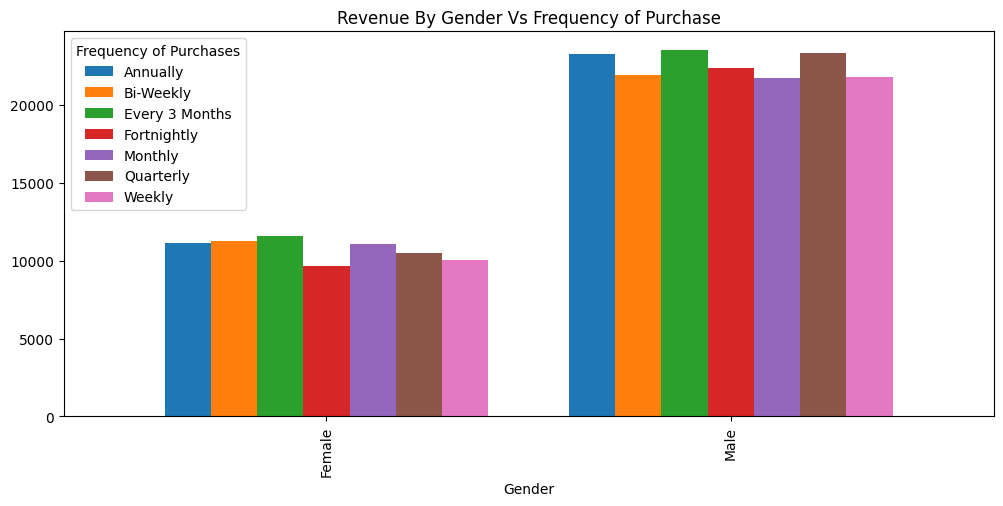

In [49]:
gender_frequency_amount = shop_trnds.groupby(["Gender", "Frequency of Purchases"])["Purchase Amount (USD)"].sum()
gender_frequency_amounts = gender_frequency_amount.unstack()
print(gender_frequency_amounts)
gender_frequency_amounts.plot(kind='bar', figsize=(12, 5), width=0.8, title='Revenue By Gender Vs Frequency of Purchase')

**Revenue By Gender vs Review Rating**

Review Rating   2.50   2.60   2.70   2.80   2.90   3.00   3.10   3.20   3.30  \
Gender                                                                         
Female         55.00 137.80 124.20 145.60 147.90 150.00 164.30 163.20 158.40   
Male          110.00 275.60 291.60 235.20 345.10 336.00 322.40 323.20 343.20   

Review Rating   3.40  ...   4.10   4.20   4.30   4.40   4.50   4.60   4.70  \
Gender                ...                                                    
Female        207.40  ... 176.30 231.00 223.60 198.00 184.50 248.40 192.70   
Male          411.40  ... 430.50 487.20 408.50 497.20 441.00 552.00 502.90   

Review Rating   4.80   4.90   5.00  
Gender                              
Female        206.40 294.00 125.00  
Male          484.80 519.40 215.00  

[2 rows x 26 columns]


<Axes: title={'center': 'Average Reviews by Gender'}, xlabel='Gender'>

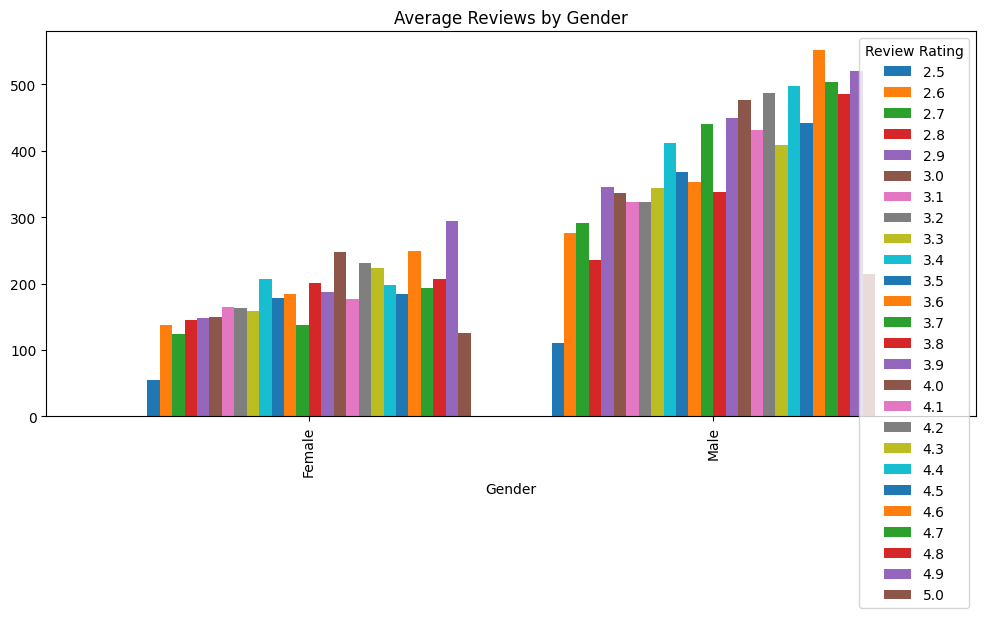

In [50]:
gender_reviews_avg_by_cat = shop_trnds.groupby(["Gender", "Review Rating"])["Review Rating"].sum()
gender_reviews_avg_by_cats = gender_reviews_avg_by_cat.unstack()
print(gender_reviews_avg_by_cats)
gender_reviews_avg_by_cats.plot(kind='bar', figsize=(12, 5), width=0.8, title='Average Reviews by Gender')

**Revenue By Gender vs Items Purchased**

In [51]:
top_sales_by_item_gender = shop_trnds.groupby(["Gender","Item Purchased"])["Purchase Amount (USD)"].sum().sort_values(ascending=False)
print(top_sales_by_item_gender)

Gender  Item Purchased
Male    Pants             7154
        Scarf             6859
        Dress             6828
        Shirt             6780
        Jewelry           6639
        Shorts            6636
        Sweater           6539
        T-shirt           6531
        Coat              6428
        Belt              6426
        Sunglasses        6401
        Blouse            6394
        Shoes             6352
        Skirt             6351
        Hat               6257
        Backpack          6223
        Jacket            6195
        Gloves            6061
        Sandals           6058
        Sneakers          6056
        Socks             6041
        Boots             5792
        Hoodie            5760
        Jeans             5614
        Handbag           5515
Female  Blouse            4016
        Shirt             3552
        Dress             3492
        Jewelry           3371
        Handbag           3342
        Sunglasses        3248
        Boots   

**Gender vs Preferred Payment Method Analysis**

**Sales By gender vs FOP**

Gender  Frequency of Purchases
Male    Every 3 Months            398
        Quarterly                 394
        Annually                  387
        Fortnightly               379
        Monthly                   368
        Weekly                    367
        Bi-Weekly                 359
Female  Bi-Weekly                 188
        Every 3 Months            186
        Annually                  185
        Monthly                   185
        Weekly                    172
        Quarterly                 169
        Fortnightly               163
Name: Frequency of Purchases, dtype: int64


<Axes: title={'center': 'Frequency of Purchases By Gender'}, xlabel='Gender,Frequency of Purchases'>

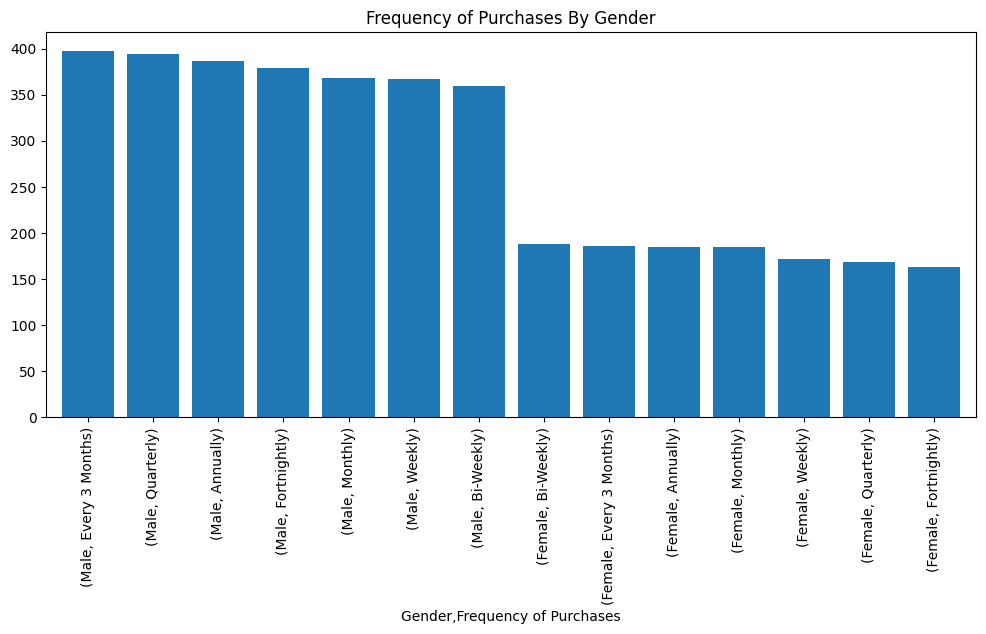

In [52]:
freq_of_purchase_gender = shop_trnds.groupby(["Gender", "Frequency of Purchases"])["Frequency of Purchases"].count().sort_values(ascending=False)
print(freq_of_purchase_gender)
freq_of_purchase_gender.plot(kind='bar', figsize=(12, 5), width=0.8, title='Frequency of Purchases By Gender')

**Sales By Gender vs Season**

Gender  Season
Male    Spring    683
        Winter    665
        Summer    657
        Fall      647
Female  Fall      328
        Spring    316
        Winter    306
        Summer    298
Name: Season, dtype: int64


<Axes: title={'center': 'Season of Purchases By Gender'}, xlabel='Gender,Season'>

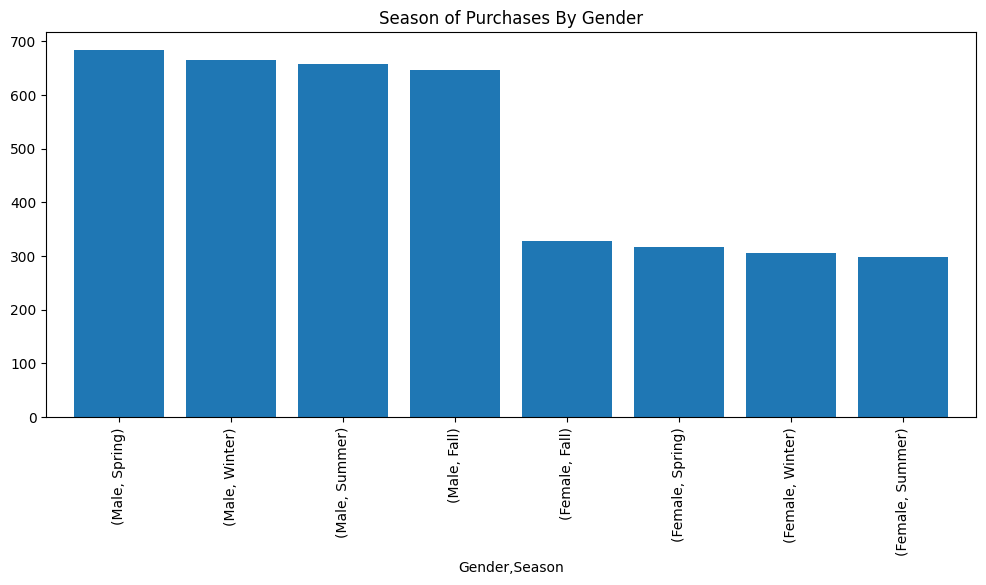

In [53]:
season_of_purchases_gender = shop_trnds.groupby(["Gender", "Season"])["Season"].count().sort_values(ascending=False)
print(season_of_purchases_gender)
season_of_purchases_gender.plot(kind='bar', figsize=(12, 5), width=0.8, title='Season of Purchases By Gender')

**Revenue by Gender vs Item Purchased**

Gender  Item Purchased
Male    Jewelry           3547
        Coat              3239
        Dress             3198
        Scarf             3068
        Shorts            3048
        Sweater           2988
        Pants             2949
        Blouse            2819
        Shirt             2760
        Gloves            2698
        Jacket            2680
        Sneakers          2673
        Belt              2648
        Hat               2639
        T-shirt           2617
        Sunglasses        2596
        Skirt             2590
        Socks             2549
        Sandals           2542
        Backpack          2530
        Shoes             2490
        Hoodie            2451
        Boots             2409
        Handbag           2404
        Jeans             2043
Female  Blouse            1744
        Shirt             1578
        Sunglasses        1525
        Socks             1416
        Jewelry           1396
        Boots             1387
        Handbag 

<Axes: title={'center': 'Previous Purchases By Gender'}, xlabel='Gender,Item Purchased'>

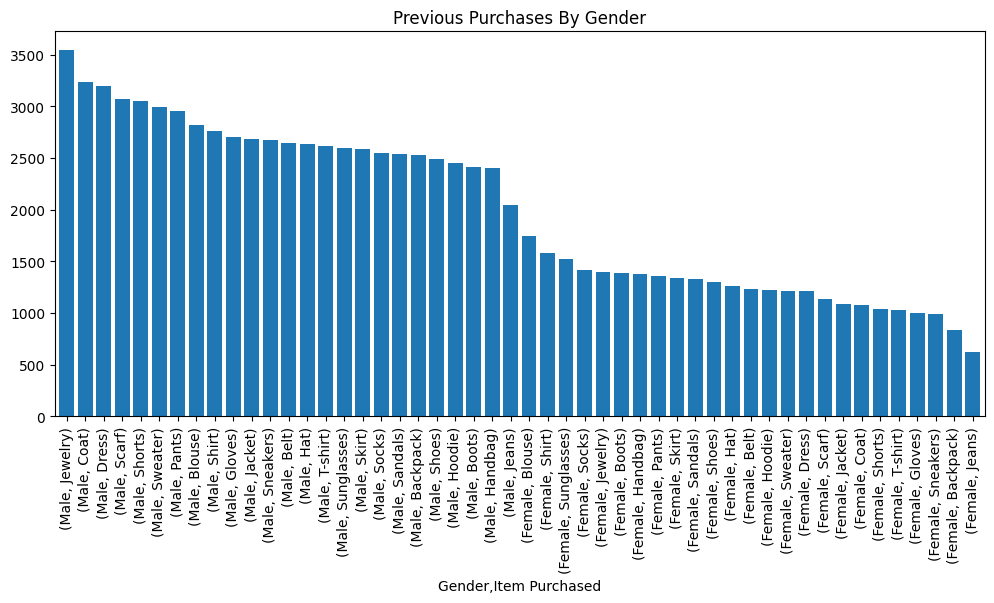

In [54]:
previous_purchases_gender = shop_trnds.groupby(["Gender", "Item Purchased"])["Previous Purchases"].sum().sort_values(ascending=False)
print(previous_purchases_gender)
previous_purchases_gender.plot(kind='bar', figsize=(12, 5), width=0.8, title='Previous Purchases By Gender')

**Sales By Gender vs Location **

Gender  Location     
Male    California       66
        Missouri         63
        New York         62
        Illinois         62
        Indiana          62
                         ..
Female  Missouri         18
        Indiana          17
        Iowa             17
        Massachusetts    16
        Hawaii           14
Name: Location, Length: 100, dtype: int64


<Axes: title={'center': 'Purchases By Gender Vs Location'}, xlabel='Gender,Location'>

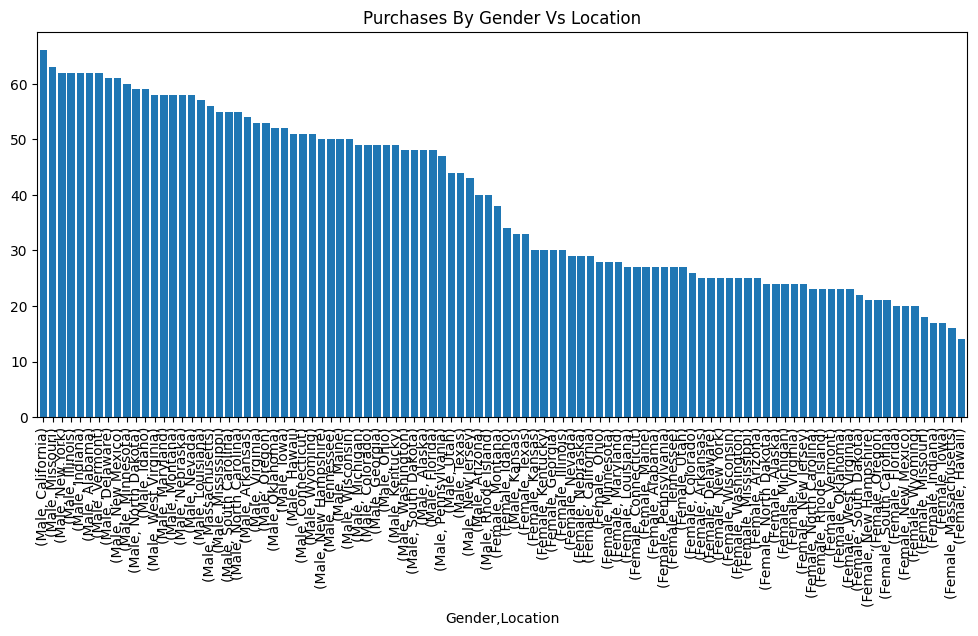

In [55]:
purchases_gender_location = shop_trnds.groupby(["Gender", "Location"])["Location"].count().sort_values(ascending=False)
print(purchases_gender_location)
purchases_gender_location.plot(kind='bar', figsize=(12, 5), width=0.8, title='Purchases By Gender Vs Location')

**Sales By Gender vs Shipping Type**

Gender  Shipping Type 
Male    Next Day Air      457
        Store Pickup      456
        Express           452
        Standard          441
        Free Shipping     426
        2-Day Shipping    420
Female  Free Shipping     249
        Standard          213
        2-Day Shipping    207
        Express           194
        Store Pickup      194
        Next Day Air      191
Name: Shipping Type, dtype: int64


<Axes: title={'center': 'Purchases By Gender Vs Shipping Type'}, xlabel='Gender,Shipping Type'>

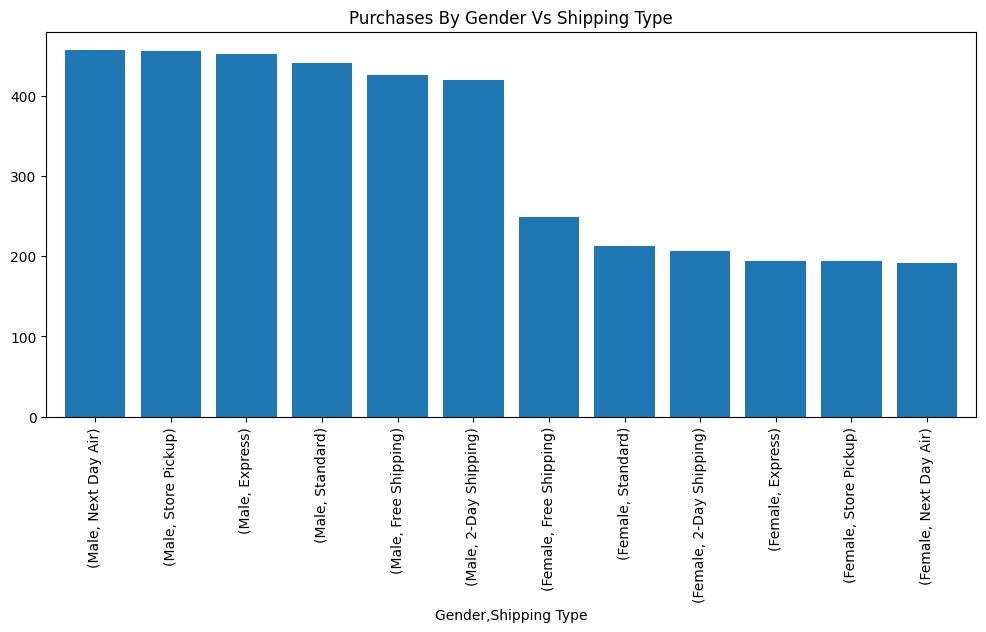

In [56]:
purchases_gender_shipping_type = shop_trnds.groupby(["Gender", "Shipping Type"])["Shipping Type"].count().sort_values(ascending=False)
print(purchases_gender_shipping_type)
purchases_gender_shipping_type.plot(kind='bar', figsize=(12, 5), width=0.8, title='Purchases By Gender Vs Shipping Type')

**Sales By Gender vs Payment Method **

Gender  Payment Method
Male    Cash              458
        PayPal            456
        Debit Card        455
        Credit Card       448
        Venmo             426
        Bank Transfer     409
Female  Credit Card       223
        PayPal            221
        Cash              212
        Venmo             208
        Bank Transfer     203
        Debit Card        181
Name: Payment Method, dtype: int64


<Axes: title={'center': 'Purchases By Gender Vs Payment Method'}, xlabel='Gender,Payment Method'>

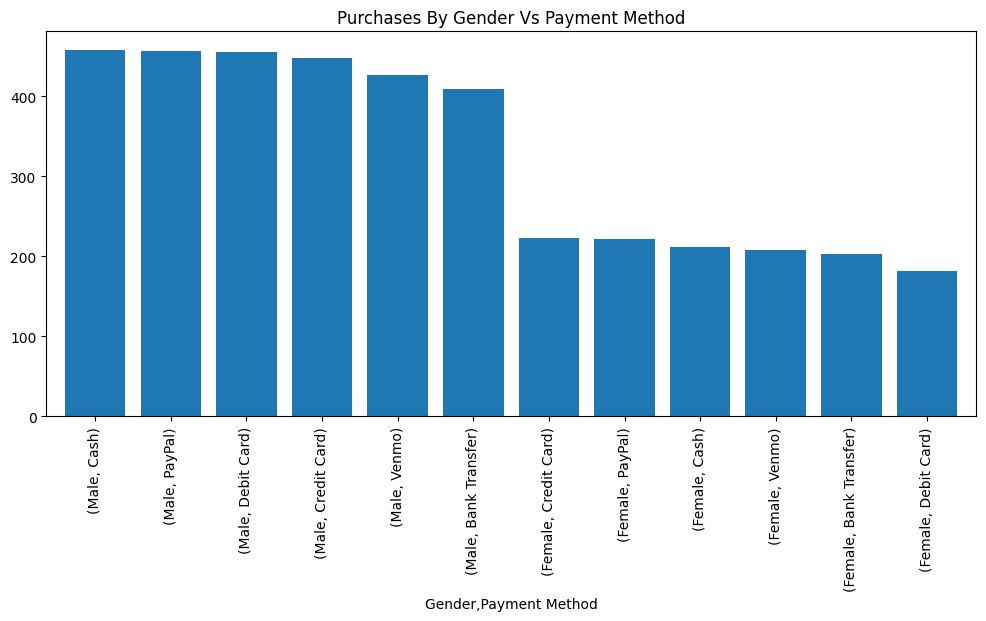

In [57]:
purchases_gender_payment_method = shop_trnds.groupby(["Gender", "Payment Method"])["Payment Method"].count().sort_values(ascending=False)
print(purchases_gender_payment_method)
purchases_gender_payment_method.plot(kind='bar', figsize=(12, 5), width=0.8, title='Purchases By Gender Vs Payment Method')

**Sales By Gender vs Category**

Gender  Category   
Male    Clothing       1181
        Accessories     848
Female  Clothing        556
Male    Footwear        400
Female  Accessories     392
Male    Outerwear       223
Female  Footwear        199
        Outerwear       101
Name: Category, dtype: int64


<Axes: title={'center': 'Purchases By Gender Vs Category'}, xlabel='Gender,Category'>

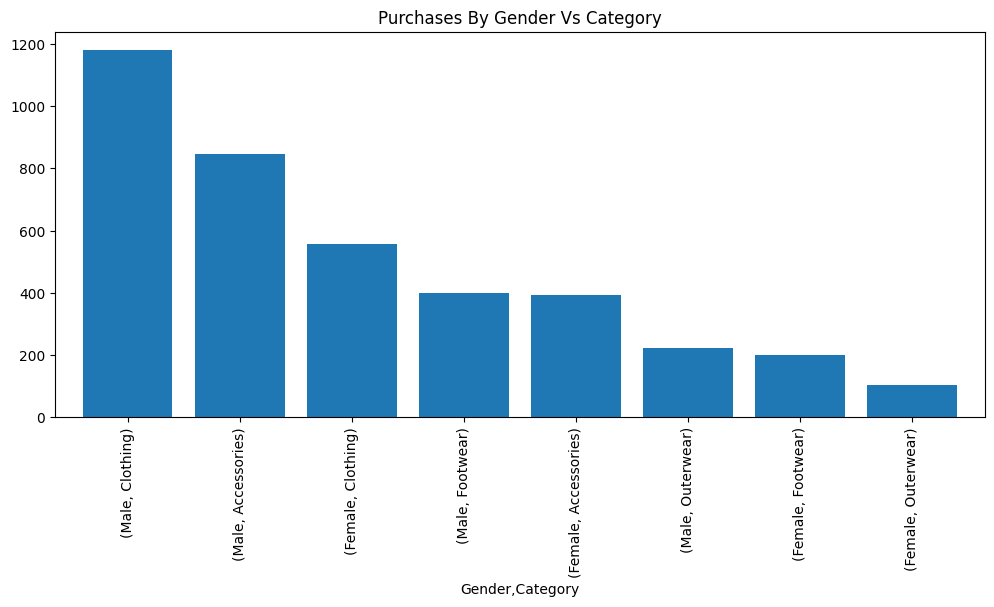

In [58]:
purchases_gender_category = shop_trnds.groupby(["Gender", "Category"])["Category"].count().sort_values(ascending=False)
print(purchases_gender_category)
purchases_gender_category.plot(kind='bar', figsize=(12, 5), width=0.8, title='Purchases By Gender Vs Category')

**Sales By Gender vs Discount Applied**

Gender  Discount Applied
Male    Yes                 1677
Female  No                  1248
Male    No                   975
Name: Discount Applied, dtype: int64


<Axes: title={'center': 'Purchases By Gender With Discount Applied'}, xlabel='Gender,Discount Applied'>

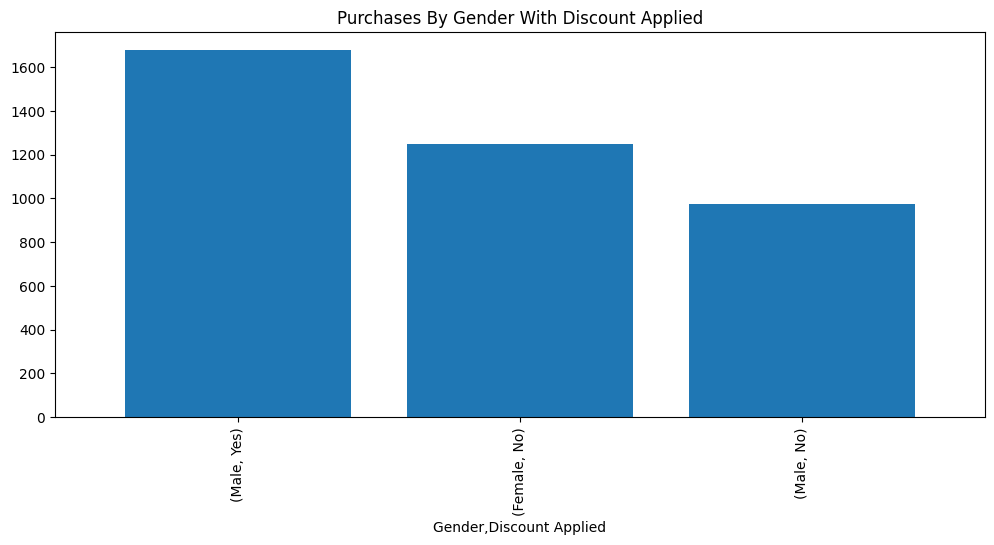

In [59]:
purchases_gender_discount = shop_trnds.groupby(["Gender", "Discount Applied"])["Discount Applied"].count().sort_values(ascending=False)
print(purchases_gender_discount)
purchases_gender_discount.plot(kind='bar', figsize=(12, 5), width=0.8, title='Purchases By Gender With Discount Applied')

**Sales By Gender vs Promo Code Used**

Gender  Promo Code Used
Male    Yes                1677
Female  No                 1248
Male    No                  975
Name: Promo Code Used, dtype: int64


<Axes: title={'center': 'Purchases By Gender With Promo Code Used'}, xlabel='Gender,Promo Code Used'>

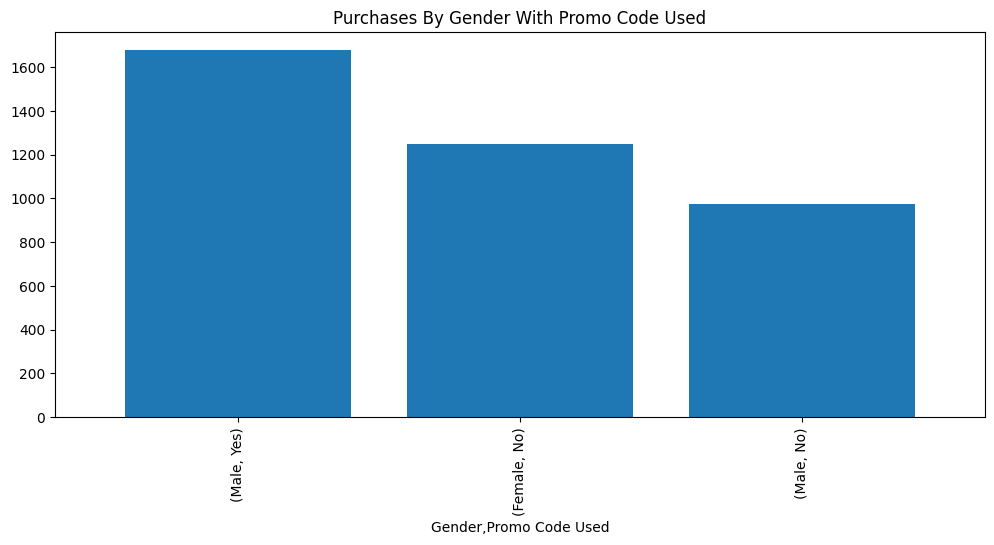

In [60]:
purchases_gender_promo_code_used = shop_trnds.groupby(["Gender", "Promo Code Used"])["Promo Code Used"].count().sort_values(ascending=False)
print(purchases_gender_promo_code_used)
purchases_gender_promo_code_used.plot(kind='bar', figsize=(12, 5), width=0.8, title='Purchases By Gender With Promo Code Used')

**Sales By Gender vs Review Rating**

Gender  Review Rating
Male    3.40             121
        4.60             120
        2.90             119
        4.00             119
        3.70             119
        4.20             116
        3.90             115
        4.40             113
        3.00             112
        2.70             108
        4.70             107
        4.90             106
        2.60             106
        3.50             105
        4.10             105
        3.10             104
        3.30             104
        3.20             101
        4.80             101
        3.60              98
        4.50              98
        4.30              95
        3.80              89
        2.80              84
Female  4.00              62
        3.40              61
        4.90              60
        4.20              55
        4.60              54
        3.10              53
        2.60              53
        3.80              53
        4.30              52
        2.80         

<Axes: title={'center': 'Purchases By Gender Vs Review Rating'}, xlabel='Gender,Review Rating'>

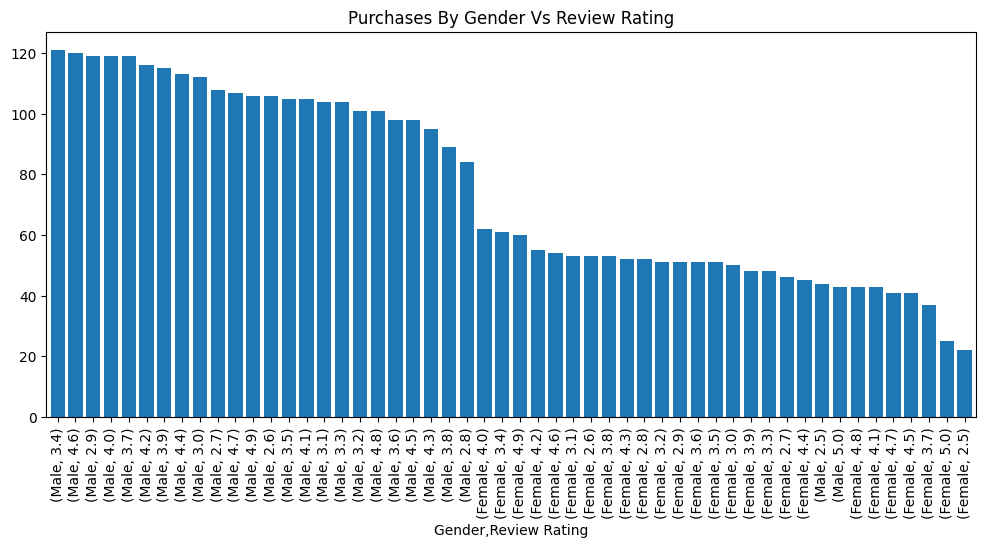

In [61]:
purchases_gender_reviews = shop_trnds.groupby(["Gender", "Review Rating"])["Review Rating"].count().sort_values(ascending=False)
print(purchases_gender_reviews)
purchases_gender_reviews.plot(kind='bar', figsize=(12, 5), width=0.8, title='Purchases By Gender Vs Review Rating')

# **Revenue Analysis**

**Total Store Revenue**

In [62]:
tot_revenue = shop_trnds["Purchase Amount (USD)"].sum()
print(f'Total Store Revenue is US$ {tot_revenue:.2f}') #Total Revenue

Total Store Revenue is US$ 233081.00


**Revenue By Category**

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


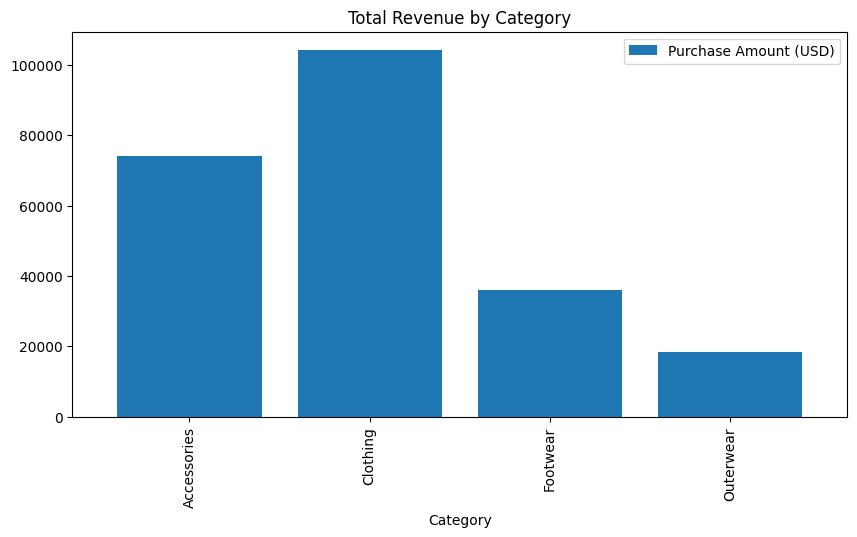

In [63]:
tot_revenue_by_cat = shop_trnds.groupby(["Category"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_cat)
catplotdata = pd.DataFrame(tot_revenue_by_cat).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Category')

**Revenue By Item**

Item Purchased
Backpack       8636
Belt           9635
Blouse        10410
Boots          9018
Coat           9275
Dress         10320
Gloves         8477
Handbag        8857
Hat            9375
Hoodie         8767
Jacket         9249
Jeans          7548
Jewelry       10010
Pants         10090
Sandals        9200
Scarf          9561
Shirt         10332
Shoes          9240
Shorts         9433
Skirt          9402
Sneakers       8635
Socks          9252
Sunglasses     9649
Sweater        9462
T-shirt        9248
Name: Purchase Amount (USD), dtype: int64


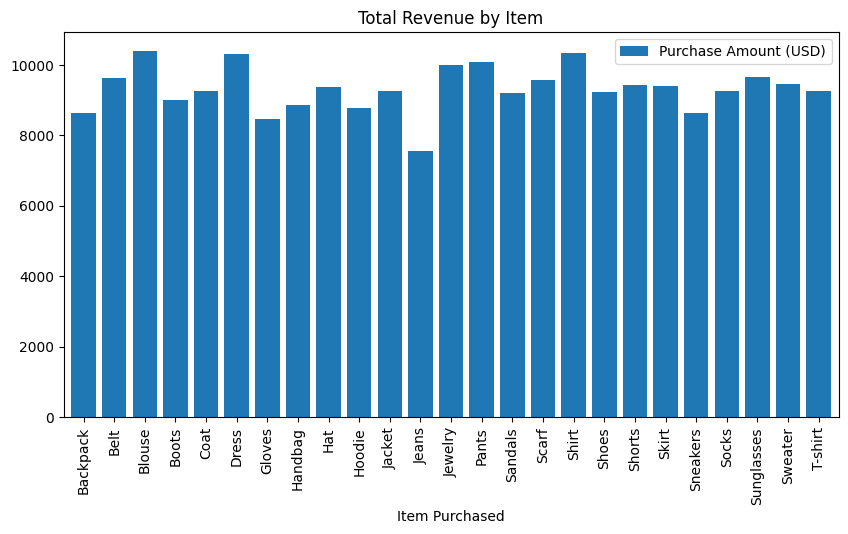

In [64]:
tot_revenue_by_item = shop_trnds.groupby(["Item Purchased"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_item)
itemplotdata = pd.DataFrame(tot_revenue_by_item).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Item').set_xticklabels(tot_revenue_by_item.index, rotation=90)


**Revenue By Payment Method**

Payment Method
Bank Transfer    36544
Cash             40002
Credit Card      40310
Debit Card       38742
PayPal           40109
Venmo            37374
Name: Purchase Amount (USD), dtype: int64


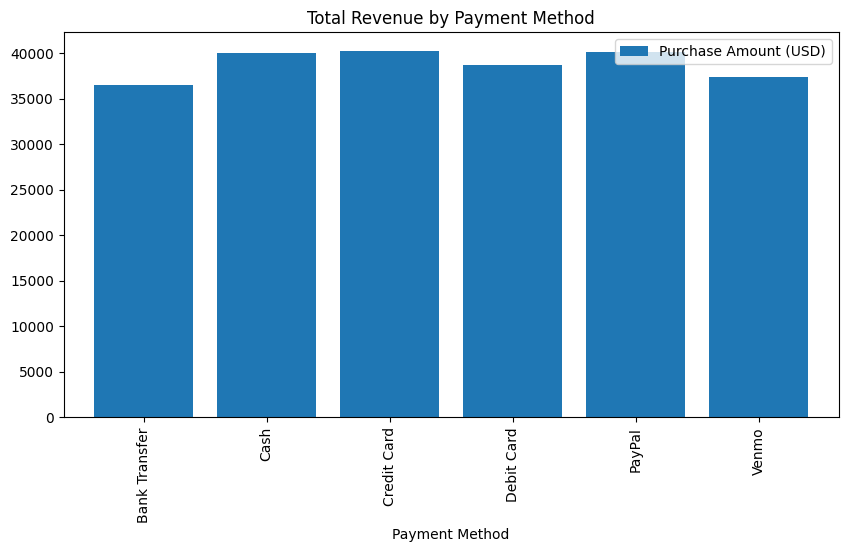

In [65]:
tot_revenue_by_payment = shop_trnds.groupby(["Payment Method"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_payment)
paymentplotdata = pd.DataFrame(tot_revenue_by_payment).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Payment Method').set_xticklabels(tot_revenue_by_payment.index, rotation=90)


**Revenue By Season**

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64


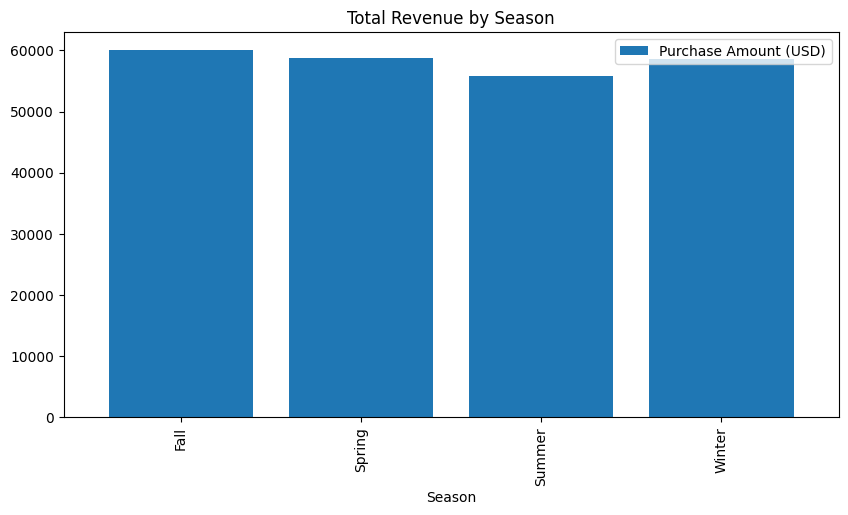

In [66]:
tot_revenue_by_season = shop_trnds.groupby(["Season"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_season)
seasonplotdata = pd.DataFrame(tot_revenue_by_season).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Season').set_xticklabels(tot_revenue_by_season.index, rotation=90)

**Revenue By Location**

Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee         4772
Texas             4712
Ut

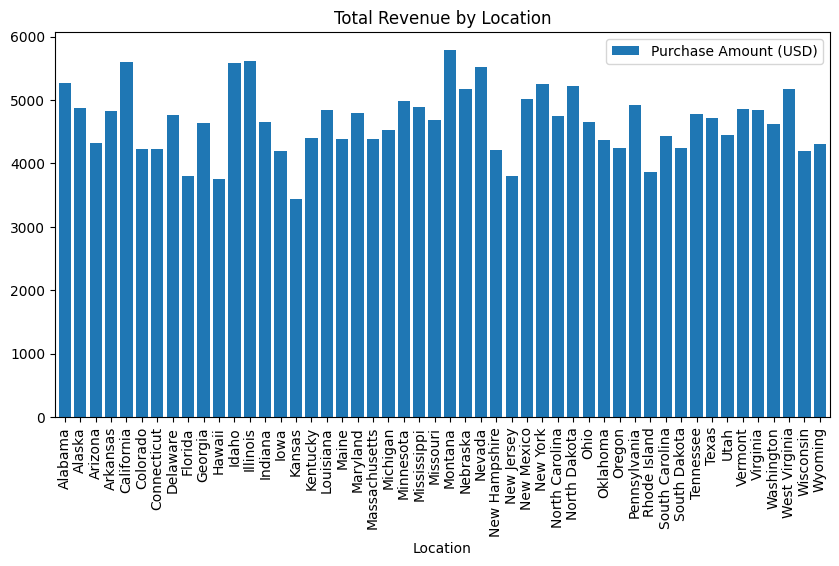

In [67]:
tot_revenue_by_location = shop_trnds.groupby(["Location"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_location)
locationplotdata = pd.DataFrame(tot_revenue_by_location).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Location').set_xticklabels(tot_revenue_by_location.index, rotation=90)


**Revenue By Shipping Type**

Shipping Type
2-Day Shipping    38080
Express           39067
Free Shipping     40777
Next Day Air      37993
Standard          38233
Store Pickup      38931
Name: Purchase Amount (USD), dtype: int64


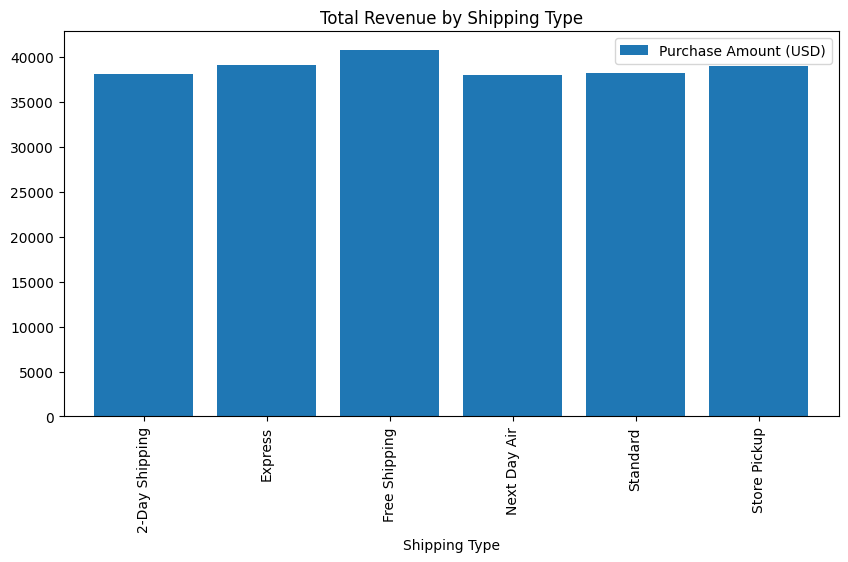

In [68]:
tot_revenue_by_shipping = shop_trnds.groupby(["Shipping Type"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_shipping)
shippingplotdata = pd.DataFrame(tot_revenue_by_shipping).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Shipping Type').set_xticklabels(tot_revenue_by_shipping.index, rotation=90)

**Revenue By Frequency of Purchase**

Frequency of Purchases
Annually          34419
Bi-Weekly         33200
Every 3 Months    35088
Fortnightly       32007
Monthly           32810
Quarterly         33771
Weekly            31786
Name: Purchase Amount (USD), dtype: int64


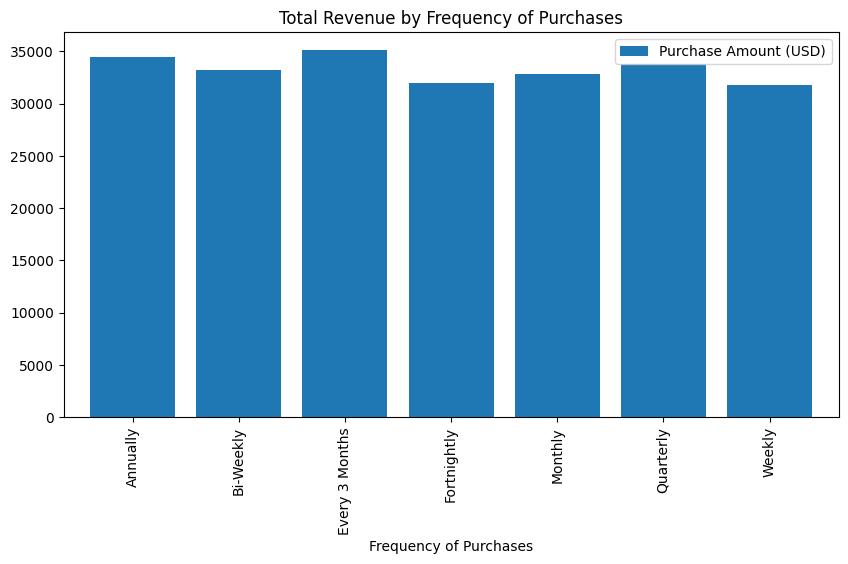

In [69]:
tot_revenue_by_frequency = shop_trnds.groupby(["Frequency of Purchases"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_frequency)
frequencyplotdata = pd.DataFrame(tot_revenue_by_frequency).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Frequency of Purchases').set_xticklabels(tot_revenue_by_frequency.index,  rotation=90)


**Revenue By Discount**

Discount Applied
No     133670
Yes     99411
Name: Purchase Amount (USD), dtype: int64


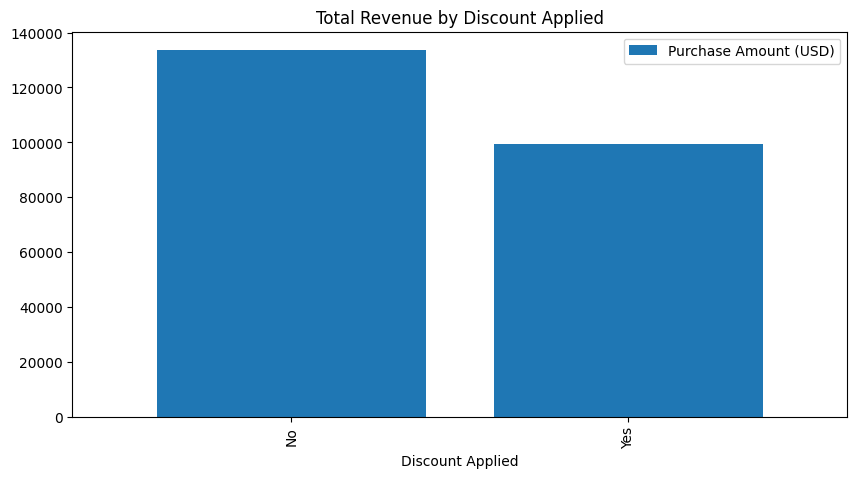

In [70]:
tot_revenue_by_discount = shop_trnds.groupby(["Discount Applied"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_discount)
discountplotdata = pd.DataFrame(tot_revenue_by_discount).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Discount Applied').set_xticklabels(tot_revenue_by_discount.index, rotation=90)


**Revenue By Discount Code Used**

Promo Code Used
No     133670
Yes     99411
Name: Purchase Amount (USD), dtype: int64


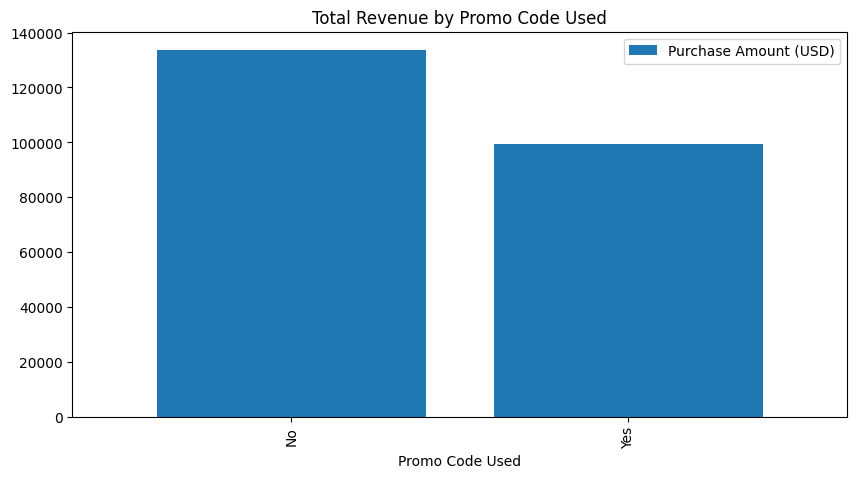

In [71]:
tot_revenue_by_promo = shop_trnds.groupby(["Promo Code Used"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_promo)
promoplotdata = pd.DataFrame(tot_revenue_by_promo).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Promo Code Used').set_xticklabels(tot_revenue_by_promo.index, rotation=90)


**Revenue By Review Rating**

Review Rating
2.50     4111
2.60     9471
2.70     9142
2.80     7761
2.90     9600
3.00     9838
3.10     9227
3.20     9320
3.30     9099
3.40    10739
3.50     9178
3.60     8541
3.70     9200
3.80     8644
3.90     9605
4.00    10722
4.10     9170
4.20    10406
4.30     8772
4.40     9563
4.50     8269
4.60    10037
4.70     8774
4.80     8911
4.90    10605
5.00     4376
Name: Purchase Amount (USD), dtype: int64


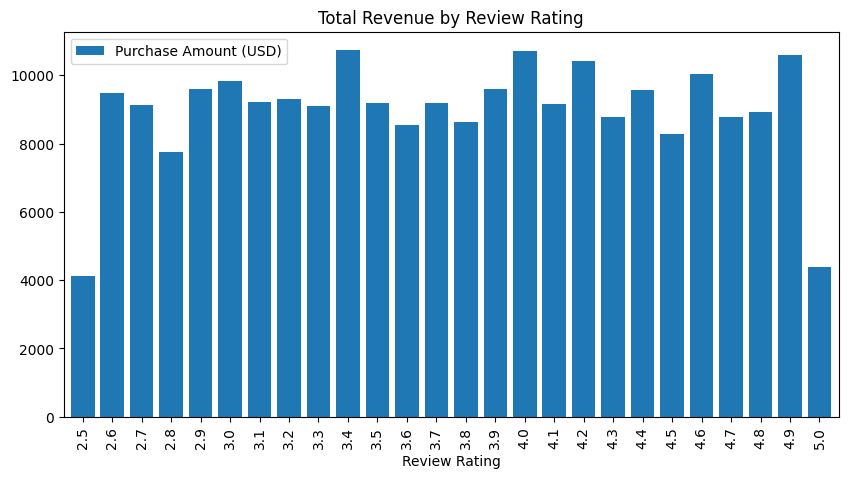

In [72]:
tot_revenue_by_review = shop_trnds.groupby(["Review Rating"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_review)
reviewplotdata = pd.DataFrame(tot_revenue_by_review).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Review Rating').set_xticklabels(tot_revenue_by_review.index,  rotation=90)


**Revenue By Gender**

Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


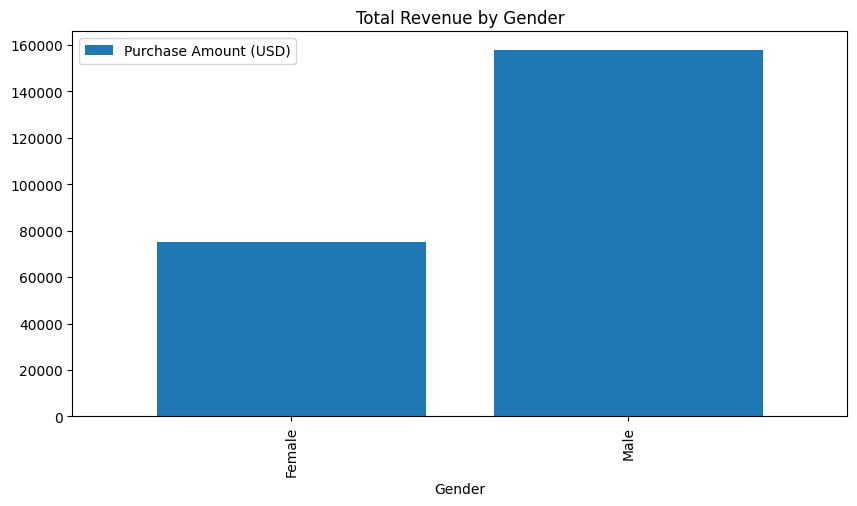

In [73]:
tot_revenue_by_gender = shop_trnds.groupby(["Gender"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_gender)
genderplotdata = pd.DataFrame(tot_revenue_by_gender).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Gender').set_xticklabels(tot_revenue_by_gender.index, rotation=90)


**Revenue By Customer Age**

Age
18    4139
19    4941
20    3424
21    4423
22    4011
23    4029
24    4291
25    5372
26    4212
27    4460
28    5104
29    4499
30    4374
31    4864
32    4796
33    3960
34    3759
35    4314
36    4511
37    4737
38    4169
39    4057
40    4026
41    5282
42    4357
43    4698
44    3312
45    4085
46    4318
47    4019
48    3576
49    5552
50    4930
51    4601
52    4255
53    4752
54    5282
55    4334
56    4293
57    5200
58    4521
59    4348
60    3730
61    4172
62    4809
63    4519
64    4170
65    4590
66    4065
67    3258
68    4287
69    5484
70    3810
Name: Purchase Amount (USD), dtype: int64


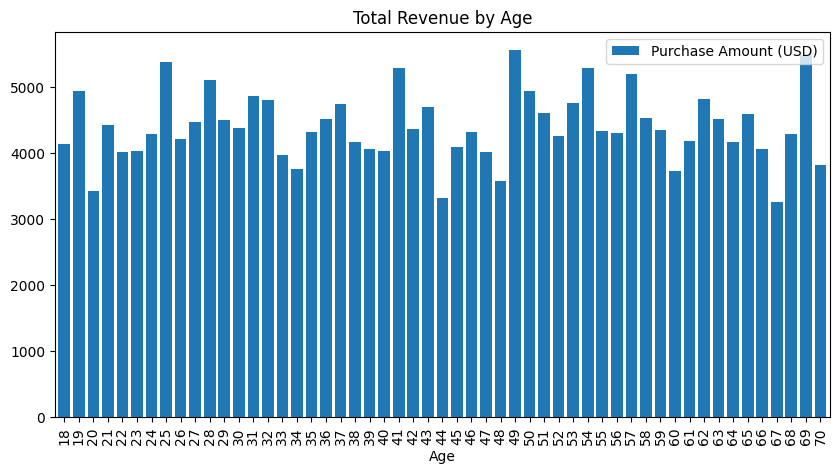

In [74]:
tot_revenue_by_age = shop_trnds.groupby(["Age"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_age)
ageplotdata = pd.DataFrame(tot_revenue_by_age).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Age').set_xticklabels(tot_revenue_by_age.index, rotation=90)


**Revenue By Size**

Size
L      61667
M     105167
S      40468
XL     25779
Name: Purchase Amount (USD), dtype: int64


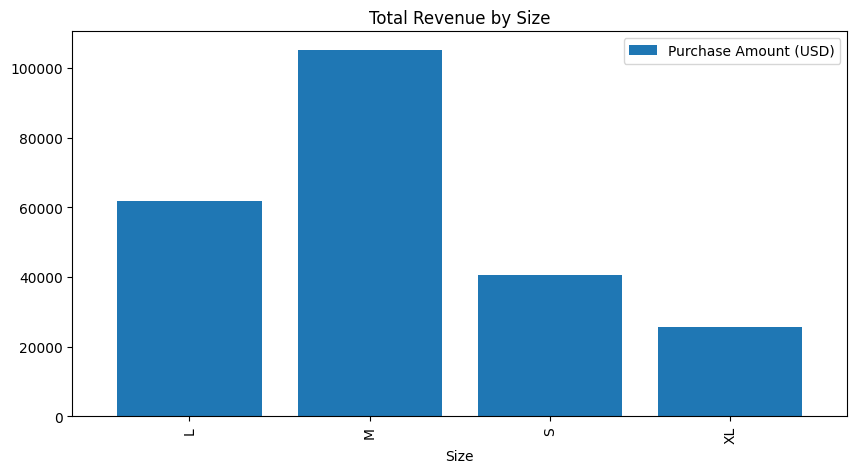

In [75]:
tot_revenue_by_size = shop_trnds.groupby(["Size"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_size)
sizeplotdata = pd.DataFrame(tot_revenue_by_size).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Size').set_xticklabels(tot_revenue_by_size.index, rotation=90)


**Revenue By Colors**

Color
Beige         8881
Black         9753
Blue          8657
Brown         8328
Charcoal      9277
Cyan         10274
Gold          8419
Gray          9936
Green        11104
Indigo        8269
Lavender      8692
Magenta       8684
Maroon        9405
Olive        10292
Orange        9377
Peach         8819
Pink          9270
Purple        9062
Red           8779
Silver        9832
Teal         10459
Turquoise     8064
Violet       10245
White         8895
Yellow       10308
Name: Purchase Amount (USD), dtype: int64


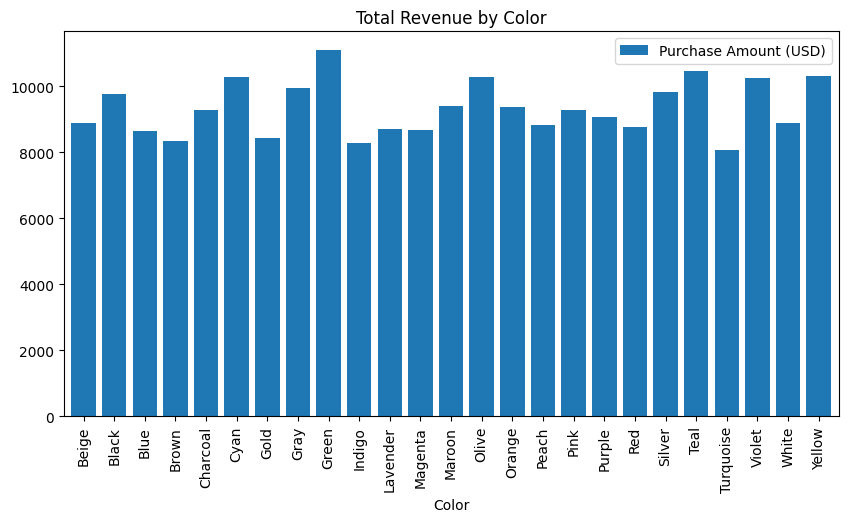

In [76]:
tot_revenue_by_color = shop_trnds.groupby(["Color"])["Purchase Amount (USD)"].sum()
print(tot_revenue_by_color)
colorplotdata = pd.DataFrame(tot_revenue_by_color).plot(kind='bar', figsize=(10, 5), width=0.8, title='Total Revenue by Color').set_xticklabels(tot_revenue_by_color.index, rotation=90)

# **Sale Analysis**

In [77]:
df = shop_trnds
g=df.groupby(['Category','Item Purchased'])['Item Purchased'].value_counts().reset_index()
fig=px.treemap(g,path=['Category','Item Purchased'],values='count')
fig.update_traces(marker=dict(cornerradius=5),textinfo = "label+value")
fig.show()

**Toal Store Sales**

In [78]:
tot_sales = shop_trnds["Purchase Amount (USD)"].count()
print(f'Stay tuned! because there are {tot_sales} items were sold in total')

Stay tuned! because there are 3900 items were sold in total


**Sales By Category**

Category
Accessories    1240
Clothing       1737
Footwear        599
Outerwear       324
Name: Purchase Amount (USD), dtype: int64


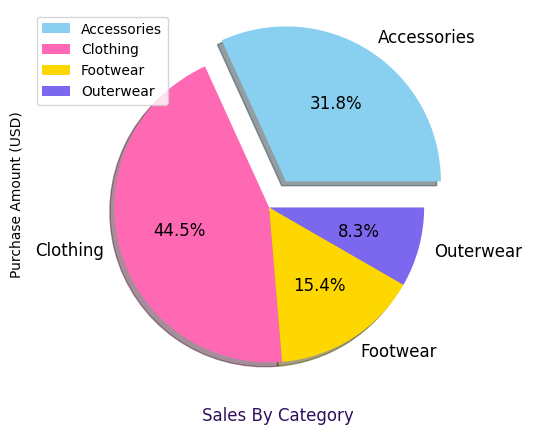

In [79]:
    tot_sales_by_cat = shop_trnds.groupby(["Category"])["Purchase Amount (USD)"].count()
    print(tot_sales_by_cat)
    myexplode = [0.2, 0, 0, 0]
    tot_sales_by_cat.plot(kind = 'pie', fontsize = 12, colors = colors,  shadow = True, autopct = '%1.1f%%', explode = myexplode)
    plt.xlabel('Sales By Category', color = "#2F0F5D", fontsize = 12, labelpad = 20)
    plt.axis('equal')
    plt.legend(labels = tot_sales_by_cat.index, loc = "best")
    plt.show()


**Sales By Item Purchased**

Item Purchased
Backpack      143
Belt          161
Blouse        171
Boots         144
Coat          161
Dress         166
Gloves        140
Handbag       153
Hat           154
Hoodie        151
Jacket        163
Jeans         124
Jewelry       171
Pants         171
Sandals       160
Scarf         157
Shirt         169
Shoes         150
Shorts        157
Skirt         158
Sneakers      145
Socks         159
Sunglasses    161
Sweater       164
T-shirt       147
Name: Purchase Amount (USD), dtype: int64


[Text(0, 0, 'Backpack'),
 Text(1, 0, 'Belt'),
 Text(2, 0, 'Blouse'),
 Text(3, 0, 'Boots'),
 Text(4, 0, 'Coat'),
 Text(5, 0, 'Dress'),
 Text(6, 0, 'Gloves'),
 Text(7, 0, 'Handbag'),
 Text(8, 0, 'Hat'),
 Text(9, 0, 'Hoodie'),
 Text(10, 0, 'Jacket'),
 Text(11, 0, 'Jeans'),
 Text(12, 0, 'Jewelry'),
 Text(13, 0, 'Pants'),
 Text(14, 0, 'Sandals'),
 Text(15, 0, 'Scarf'),
 Text(16, 0, 'Shirt'),
 Text(17, 0, 'Shoes'),
 Text(18, 0, 'Shorts'),
 Text(19, 0, 'Skirt'),
 Text(20, 0, 'Sneakers'),
 Text(21, 0, 'Socks'),
 Text(22, 0, 'Sunglasses'),
 Text(23, 0, 'Sweater'),
 Text(24, 0, 'T-shirt')]

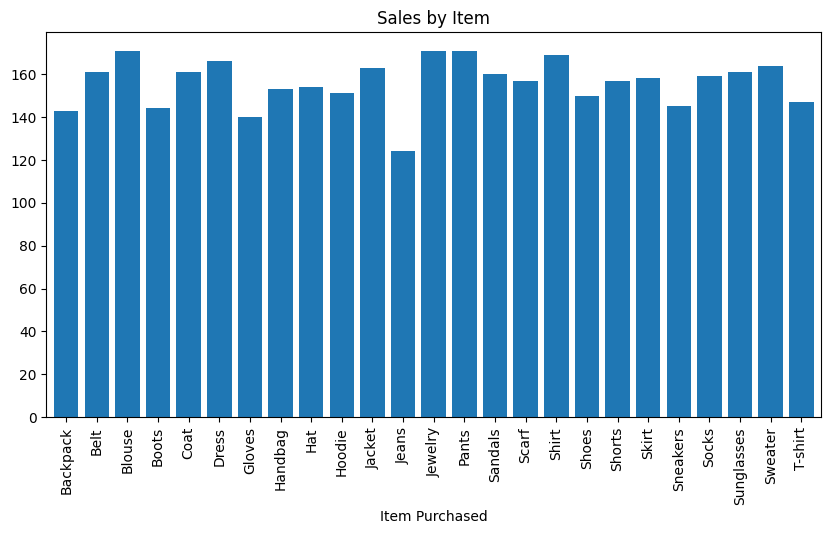

In [80]:
tot_sales_by_item = shop_trnds.groupby(["Item Purchased"])["Purchase Amount (USD)"].count()
print(tot_sales_by_item)
tot_sales_by_item.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Item').set_xticklabels(tot_sales_by_item.index, rotation=90)

**Sales By Payment Method**

Payment Method
Bank Transfer    612
Cash             670
Credit Card      671
Debit Card       636
PayPal           677
Venmo            634
Name: Purchase Amount (USD), dtype: int64


[Text(0, 0, 'Bank Transfer'),
 Text(1, 0, 'Cash'),
 Text(2, 0, 'Credit Card'),
 Text(3, 0, 'Debit Card'),
 Text(4, 0, 'PayPal'),
 Text(5, 0, 'Venmo')]

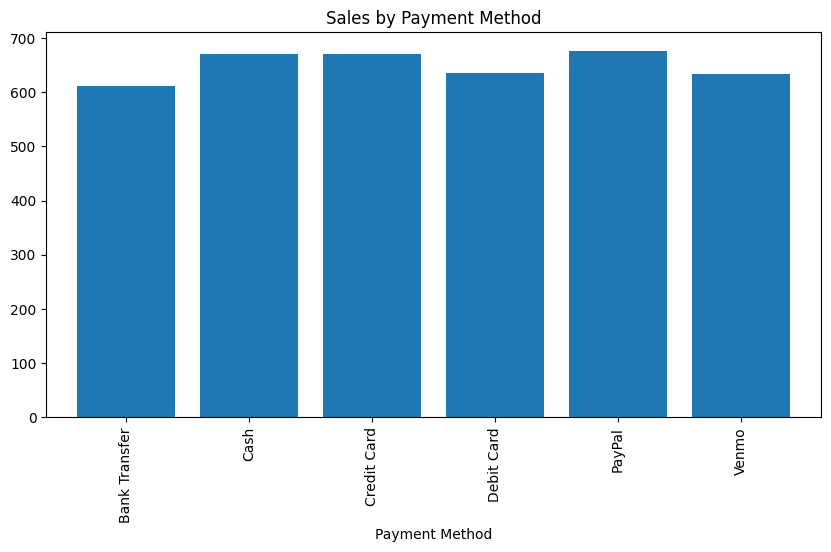

In [81]:
tot_sales_by_payment = shop_trnds.groupby(["Payment Method"])["Purchase Amount (USD)"].count()
print(tot_sales_by_payment)
tot_sales_by_payment.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Payment Method').set_xticklabels(tot_sales_by_payment.index, rotation=90)

**Sales By Season**

Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Purchase Amount (USD), dtype: int64


[Text(0, 0, 'Fall'),
 Text(1, 0, 'Spring'),
 Text(2, 0, 'Summer'),
 Text(3, 0, 'Winter')]

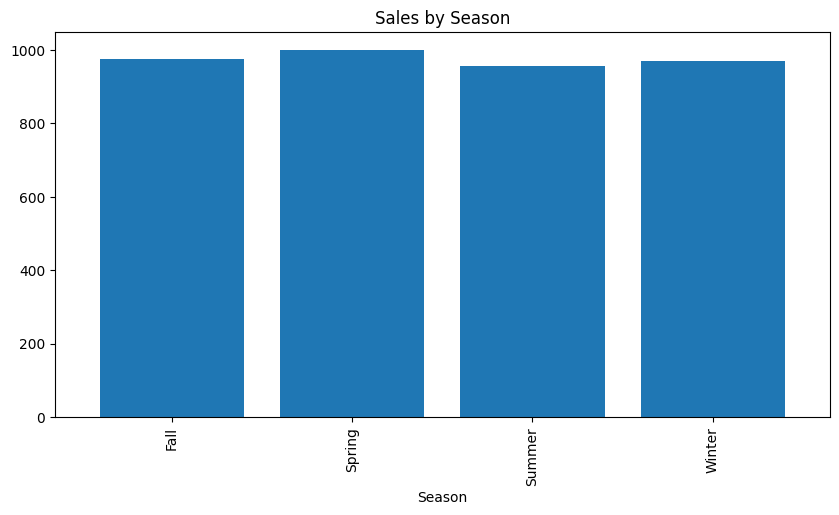

In [82]:
tot_sales_by_season = shop_trnds.groupby(["Season"])["Purchase Amount (USD)"].count()
print(tot_sales_by_season)
tot_sales_by_season.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Season').set_xticklabels(tot_sales_by_season.index, rotation=90)

**Sales By Location (State)**

Location
Alabama           89
Alaska            72
Arizona           65
Arkansas          79
California        95
Colorado          75
Connecticut       78
Delaware          86
Florida           68
Georgia           79
Hawaii            65
Idaho             93
Illinois          92
Indiana           79
Iowa              69
Kansas            63
Kentucky          79
Louisiana         84
Maine             77
Maryland          86
Massachusetts     72
Michigan          73
Minnesota         88
Mississippi       80
Missouri          81
Montana           96
Nebraska          87
Nevada            87
New Hampshire     71
New Jersey        67
New Mexico        81
New York          87
North Carolina    78
North Dakota      83
Ohio              77
Oklahoma          75
Oregon            74
Pennsylvania      74
Rhode Island      63
South Carolina    76
South Dakota      70
Tennessee         77
Texas             77
Utah              71
Vermont           85
Virginia          77
Washington        73
West

[Text(0, 0, 'Alabama'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Arizona'),
 Text(3, 0, 'Arkansas'),
 Text(4, 0, 'California'),
 Text(5, 0, 'Colorado'),
 Text(6, 0, 'Connecticut'),
 Text(7, 0, 'Delaware'),
 Text(8, 0, 'Florida'),
 Text(9, 0, 'Georgia'),
 Text(10, 0, 'Hawaii'),
 Text(11, 0, 'Idaho'),
 Text(12, 0, 'Illinois'),
 Text(13, 0, 'Indiana'),
 Text(14, 0, 'Iowa'),
 Text(15, 0, 'Kansas'),
 Text(16, 0, 'Kentucky'),
 Text(17, 0, 'Louisiana'),
 Text(18, 0, 'Maine'),
 Text(19, 0, 'Maryland'),
 Text(20, 0, 'Massachusetts'),
 Text(21, 0, 'Michigan'),
 Text(22, 0, 'Minnesota'),
 Text(23, 0, 'Mississippi'),
 Text(24, 0, 'Missouri'),
 Text(25, 0, 'Montana'),
 Text(26, 0, 'Nebraska'),
 Text(27, 0, 'Nevada'),
 Text(28, 0, 'New Hampshire'),
 Text(29, 0, 'New Jersey'),
 Text(30, 0, 'New Mexico'),
 Text(31, 0, 'New York'),
 Text(32, 0, 'North Carolina'),
 Text(33, 0, 'North Dakota'),
 Text(34, 0, 'Ohio'),
 Text(35, 0, 'Oklahoma'),
 Text(36, 0, 'Oregon'),
 Text(37, 0, 'Pennsylvania'),
 Text(38, 0, '

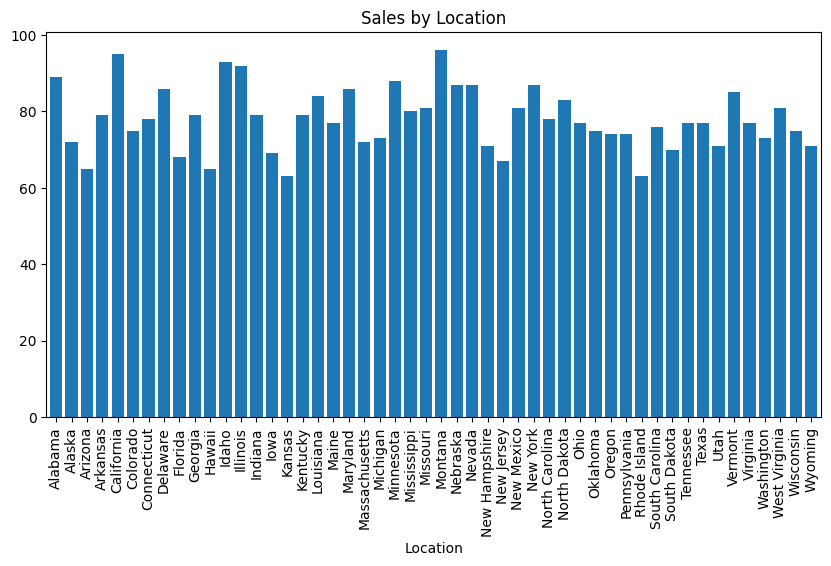

In [83]:
tot_sales_by_location = shop_trnds.groupby(["Location"])["Purchase Amount (USD)"].count()
print(tot_sales_by_location)
tot_sales_by_location.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Location').set_xticklabels(tot_sales_by_location.index, rotation=90)


**Sales By Shipping Type**

Shipping Type
2-Day Shipping    627
Express           646
Free Shipping     675
Next Day Air      648
Standard          654
Store Pickup      650
Name: Purchase Amount (USD), dtype: int64


[Text(0, 0, '2-Day Shipping'),
 Text(1, 0, 'Express'),
 Text(2, 0, 'Free Shipping'),
 Text(3, 0, 'Next Day Air'),
 Text(4, 0, 'Standard'),
 Text(5, 0, 'Store Pickup')]

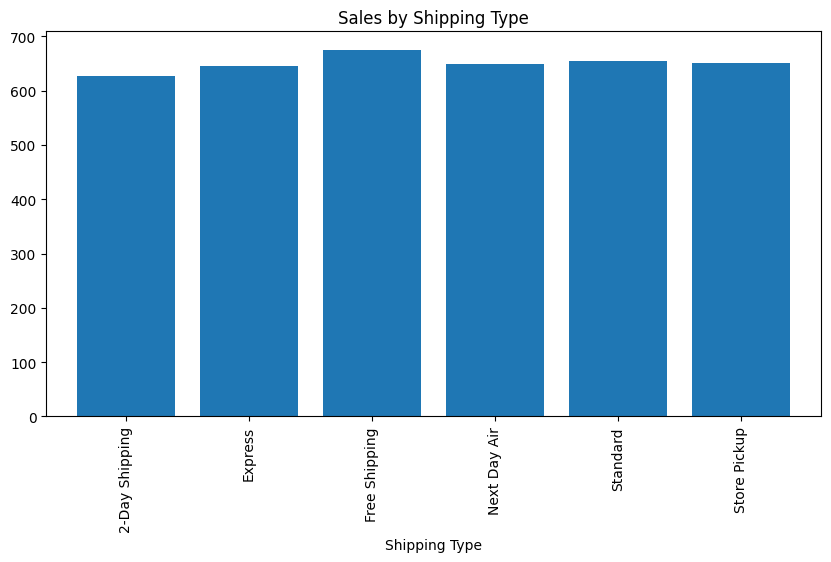

In [84]:
tot_sales_by_shipping = shop_trnds.groupby(["Shipping Type"])["Purchase Amount (USD)"].count()
print(tot_sales_by_shipping)
tot_sales_by_shipping.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Shipping Type').set_xticklabels(tot_sales_by_shipping.index, rotation=90)


**Sales By FOP**

Frequency of Purchases
Annually          572
Bi-Weekly         547
Every 3 Months    584
Fortnightly       542
Monthly           553
Quarterly         563
Weekly            539
Name: Purchase Amount (USD), dtype: int64


[Text(0, 0, 'Annually'),
 Text(1, 0, 'Bi-Weekly'),
 Text(2, 0, 'Every 3 Months'),
 Text(3, 0, 'Fortnightly'),
 Text(4, 0, 'Monthly'),
 Text(5, 0, 'Quarterly'),
 Text(6, 0, 'Weekly')]

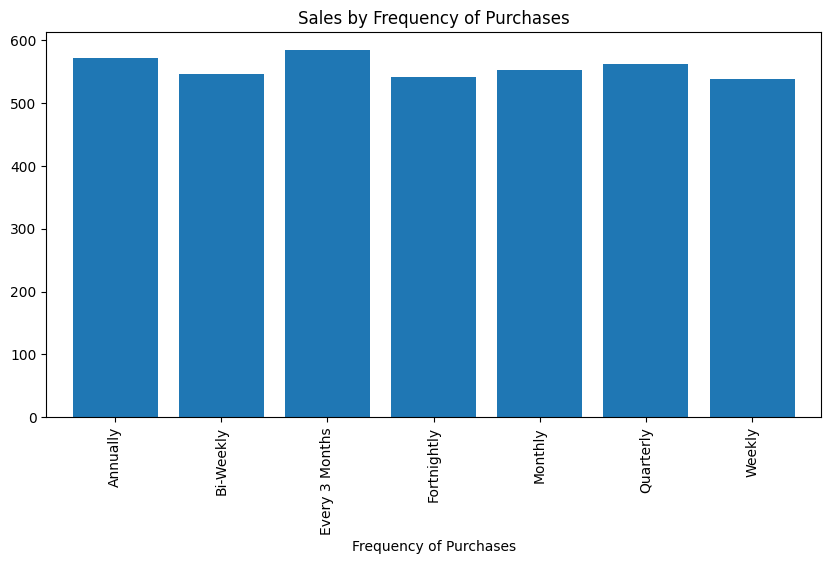

In [85]:
tot_sales_by_frequency = shop_trnds.groupby(["Frequency of Purchases"])["Purchase Amount (USD)"].count()
print(tot_sales_by_frequency)
tot_sales_by_frequency.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Frequency of Purchases').set_xticklabels(tot_sales_by_frequency.index, rotation=90)

**Sales By Discount**

Discount Applied
No     2223
Yes    1677
Name: Purchase Amount (USD), dtype: int64


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

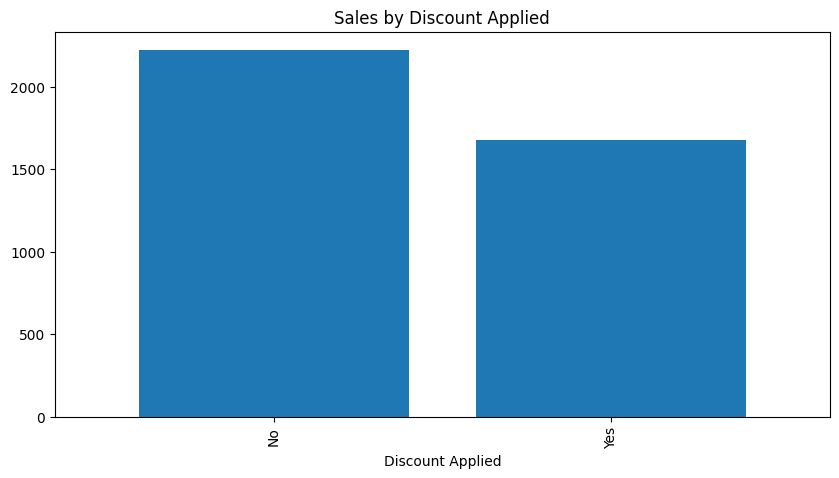

In [86]:
tot_sales_by_discount = shop_trnds.groupby(["Discount Applied"])["Purchase Amount (USD)"].count()
print(tot_sales_by_discount)
tot_sales_by_discount.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Discount Applied').set_xticklabels(tot_sales_by_discount.index, rotation=90)

**Sales By Promo Code Used**

Promo Code Used
No     2223
Yes    1677
Name: Purchase Amount (USD), dtype: int64


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

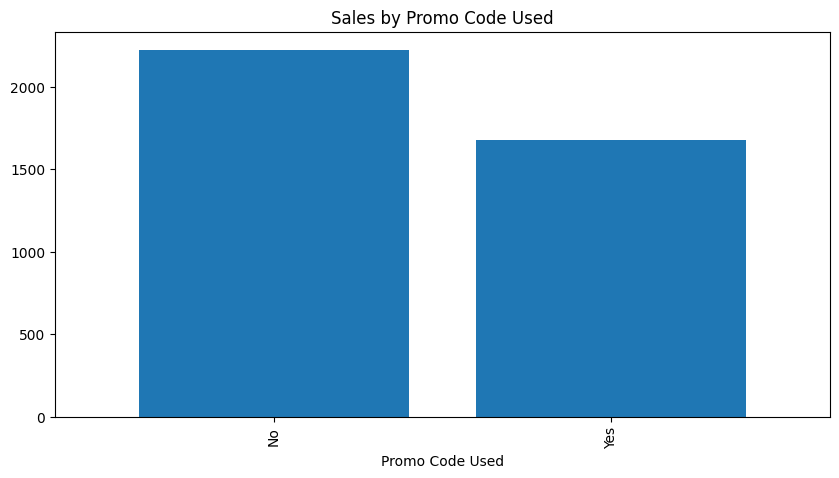

In [87]:
tot_sales_by_promo = shop_trnds.groupby(["Promo Code Used"])["Purchase Amount (USD)"].count()
print(tot_sales_by_promo)
tot_sales_by_promo.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Promo Code Used').set_xticklabels(tot_sales_by_promo.index, rotation= 90)


**Sales By Review Rating**

Review Rating
2.50     66
2.60    159
2.70    154
2.80    136
2.90    170
3.00    162
3.10    157
3.20    152
3.30    152
3.40    182
3.50    156
3.60    149
3.70    156
3.80    142
3.90    163
4.00    181
4.10    148
4.20    171
4.30    147
4.40    158
4.50    139
4.60    174
4.70    148
4.80    144
4.90    166
5.00     68
Name: Purchase Amount (USD), dtype: int64


[Text(0, 0, '2.5'),
 Text(1, 0, '2.6'),
 Text(2, 0, '2.7'),
 Text(3, 0, '2.8'),
 Text(4, 0, '2.9'),
 Text(5, 0, '3.0'),
 Text(6, 0, '3.1'),
 Text(7, 0, '3.2'),
 Text(8, 0, '3.3'),
 Text(9, 0, '3.4'),
 Text(10, 0, '3.5'),
 Text(11, 0, '3.6'),
 Text(12, 0, '3.7'),
 Text(13, 0, '3.8'),
 Text(14, 0, '3.9'),
 Text(15, 0, '4.0'),
 Text(16, 0, '4.1'),
 Text(17, 0, '4.2'),
 Text(18, 0, '4.3'),
 Text(19, 0, '4.4'),
 Text(20, 0, '4.5'),
 Text(21, 0, '4.6'),
 Text(22, 0, '4.7'),
 Text(23, 0, '4.8'),
 Text(24, 0, '4.9'),
 Text(25, 0, '5.0')]

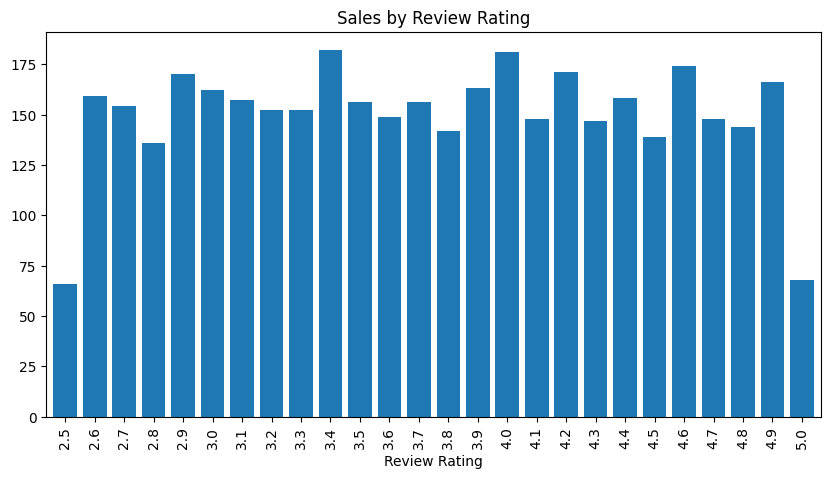

In [88]:
tot_sales_by_review = shop_trnds.groupby(["Review Rating"])["Purchase Amount (USD)"].count()
print(tot_sales_by_review)
tot_sales_by_review.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Review Rating').set_xticklabels(tot_sales_by_review.index, rotation=90)

**Sales By Gender**

Gender
Female    1248
Male      2652
Name: Purchase Amount (USD), dtype: int64


[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

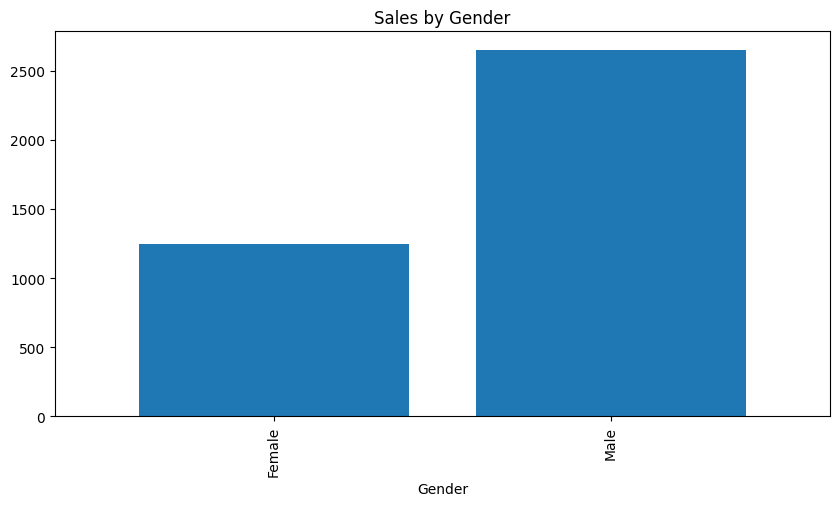

In [89]:
tot_sales_by_gender = shop_trnds.groupby(["Gender"])["Purchase Amount (USD)"].count()
print(tot_sales_by_gender)
tot_sales_by_gender.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Gender').set_xticklabels(tot_sales_by_gender.index, rotation=90)

**Sales By Customer Age **

Age
18    69
19    81
20    62
21    69
22    66
23    71
24    68
25    85
26    69
27    83
28    79
29    76
30    71
31    79
32    82
33    63
34    68
35    72
36    74
37    77
38    70
39    68
40    72
41    86
42    80
43    79
44    51
45    72
46    76
47    71
48    68
49    84
50    83
51    72
52    73
53    70
54    83
55    73
56    74
57    87
58    81
59    75
60    65
61    65
62    83
63    75
64    73
65    72
66    71
67    54
68    75
69    88
70    67
Name: Purchase Amount (USD), dtype: int64


[Text(0, 0, '18'),
 Text(1, 0, '19'),
 Text(2, 0, '20'),
 Text(3, 0, '21'),
 Text(4, 0, '22'),
 Text(5, 0, '23'),
 Text(6, 0, '24'),
 Text(7, 0, '25'),
 Text(8, 0, '26'),
 Text(9, 0, '27'),
 Text(10, 0, '28'),
 Text(11, 0, '29'),
 Text(12, 0, '30'),
 Text(13, 0, '31'),
 Text(14, 0, '32'),
 Text(15, 0, '33'),
 Text(16, 0, '34'),
 Text(17, 0, '35'),
 Text(18, 0, '36'),
 Text(19, 0, '37'),
 Text(20, 0, '38'),
 Text(21, 0, '39'),
 Text(22, 0, '40'),
 Text(23, 0, '41'),
 Text(24, 0, '42'),
 Text(25, 0, '43'),
 Text(26, 0, '44'),
 Text(27, 0, '45'),
 Text(28, 0, '46'),
 Text(29, 0, '47'),
 Text(30, 0, '48'),
 Text(31, 0, '49'),
 Text(32, 0, '50'),
 Text(33, 0, '51'),
 Text(34, 0, '52'),
 Text(35, 0, '53'),
 Text(36, 0, '54'),
 Text(37, 0, '55'),
 Text(38, 0, '56'),
 Text(39, 0, '57'),
 Text(40, 0, '58'),
 Text(41, 0, '59'),
 Text(42, 0, '60'),
 Text(43, 0, '61'),
 Text(44, 0, '62'),
 Text(45, 0, '63'),
 Text(46, 0, '64'),
 Text(47, 0, '65'),
 Text(48, 0, '66'),
 Text(49, 0, '67'),
 Text(50, 

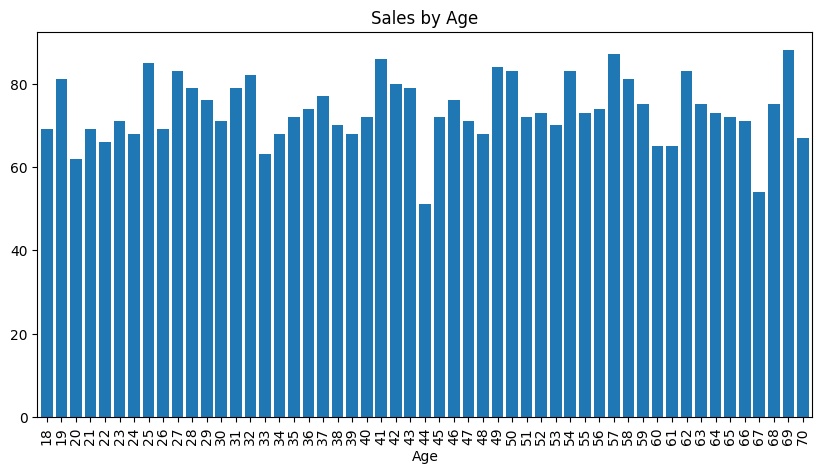

In [90]:
tot_sales_by_age = shop_trnds.groupby(["Age"])["Purchase Amount (USD)"].count()
print(tot_sales_by_age)
tot_sales_by_age.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Age').set_xticklabels(tot_sales_by_age.index, rotation=90)

**Sales By Item Size**

Size
L     1053
M     1755
S      663
XL     429
Name: Purchase Amount (USD), dtype: int64


[Text(0, 0, 'L'), Text(1, 0, 'M'), Text(2, 0, 'S'), Text(3, 0, 'XL')]

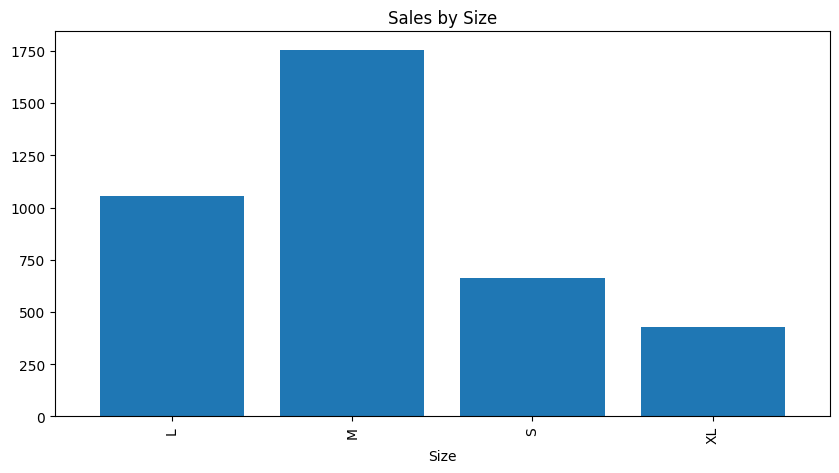

In [91]:
tot_sales_by_size = shop_trnds.groupby(["Size"])["Purchase Amount (USD)"].count()
print(tot_sales_by_size)
tot_sales_by_size.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Size').set_xticklabels(tot_sales_by_size.index, rotation=90)

**Sales By Item Color**

Color
Beige        147
Black        167
Blue         152
Brown        141
Charcoal     153
Cyan         166
Gold         138
Gray         159
Green        169
Indigo       147
Lavender     147
Magenta      152
Maroon       158
Olive        177
Orange       154
Peach        149
Pink         153
Purple       151
Red          148
Silver       173
Teal         172
Turquoise    145
Violet       166
White        142
Yellow       174
Name: Purchase Amount (USD), dtype: int64


[Text(0, 0, 'Beige'),
 Text(1, 0, 'Black'),
 Text(2, 0, 'Blue'),
 Text(3, 0, 'Brown'),
 Text(4, 0, 'Charcoal'),
 Text(5, 0, 'Cyan'),
 Text(6, 0, 'Gold'),
 Text(7, 0, 'Gray'),
 Text(8, 0, 'Green'),
 Text(9, 0, 'Indigo'),
 Text(10, 0, 'Lavender'),
 Text(11, 0, 'Magenta'),
 Text(12, 0, 'Maroon'),
 Text(13, 0, 'Olive'),
 Text(14, 0, 'Orange'),
 Text(15, 0, 'Peach'),
 Text(16, 0, 'Pink'),
 Text(17, 0, 'Purple'),
 Text(18, 0, 'Red'),
 Text(19, 0, 'Silver'),
 Text(20, 0, 'Teal'),
 Text(21, 0, 'Turquoise'),
 Text(22, 0, 'Violet'),
 Text(23, 0, 'White'),
 Text(24, 0, 'Yellow')]

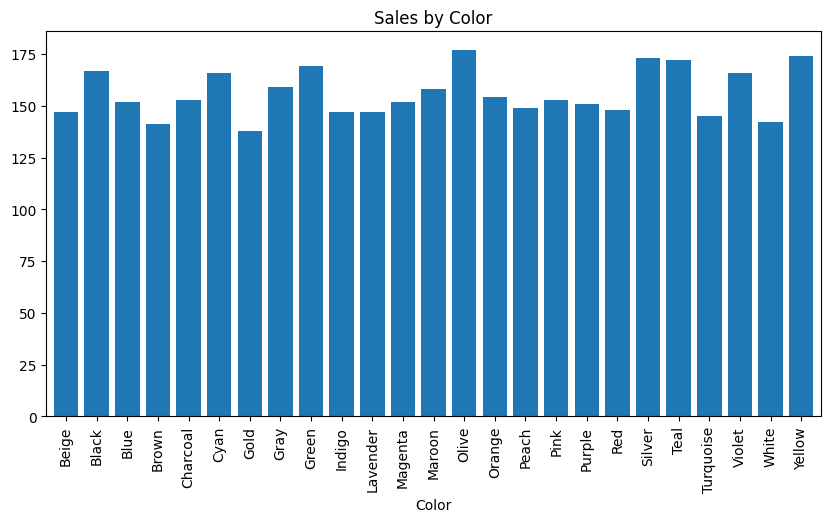

In [92]:
tot_sales_by_color = shop_trnds.groupby(["Color"])["Purchase Amount (USD)"].count()
print(tot_sales_by_color)
tot_sales_by_color.plot(kind='bar', figsize=(10, 5), width=0.8, title='Sales by Color').set_xticklabels(tot_sales_by_color.index, rotation= 90)

**Most common items purchased**

In [93]:
# Most common items purchased
most_common_item_purchased = shop_trnds['Item Purchased'].mode()
print("Most common items being purchased are:")
print(most_common_item_purchased)


Most common items being purchased are:
0     Blouse
1    Jewelry
2      Pants
Name: Item Purchased, dtype: object


**Average age of people who purchased items**

# **Trend Analysis**

**Analyze Regional Trends**

In [94]:
# Analyze regional trends
df = shop_trnds
location_groups = df.groupby("Location")

for location, location_data in location_groups:
    print(f"Regional Trends for {location}:")

    # Calculate average purchase amount in this region
    avg_purchase_amount = location_data["Purchase Amount (USD)"].mean()
    print(f"Average Purchase Amount: ${avg_purchase_amount:.2f}")

    # Count the most popular product categories in this region
    popular_categories = location_data["Category"].value_counts().idxmax()
    print(f"Most Popular Category: {popular_categories}")

    # Count the most popular product in the region
    popular_item = location_data["Item Purchased"].value_counts().idxmax()
    print(f"Most Popular Item: {popular_item}")

    # Analyze online shopping preferences
    online_shopping = location_data["Shipping Type"].apply(lambda x: "Online" if "Express" in x or "Standard" in x else "Offline")
    online_percentage = (online_shopping.value_counts() / len(online_shopping)) * 100
    print(f"Online Shopping Preference:")
    print(online_percentage)

    # Analyze subscription status
    subscription_status = location_data["Subscription Status"].value_counts().idxmax()
    print(f"Subscription Status:")
    print(subscription_status)

    # Analyze gender distribution
    gender_distribution = location_data["Gender"].value_counts().idxmax()
    print(f"Gender Distribution:")
    print(gender_distribution)

    # Analyze payment methods
    payment_methods = location_data["Payment Method"].value_counts().idxmax()
    print(f"Payment Methods:")
    print(payment_methods)

    # Analyze seasonality
    seasonality = location_data["Season"].value_counts().idxmax()
    print(f"Seasonality:")
    print(seasonality)

    # Analyze review ratings
    review_ratings = location_data["Review Rating"].value_counts().idxmax()
    print(f"Review Ratings:")
    print(review_ratings)

    # Analyze frequency of purchases
    frequency_of_purchases = location_data["Frequency of Purchases"].value_counts().idxmax()
    print(f"Frequency of Purchases:")
    print(frequency_of_purchases)

    # Analyze discount applied
    discount_applied = location_data["Discount Applied"].value_counts().idxmax()
    print(f"Discount Applied:")
    print(discount_applied)

    # Analyze promo code used
    promo_code_used = location_data["Promo Code Used"].value_counts().idxmax()
    print(f"Promo Code Used:")
    print(promo_code_used)

    # Analyze item sizes
    item_sizes = location_data["Size"].value_counts().idxmax()
    print(f"Item Sizes:")
    print(item_sizes)

    # Analyze item colors
    item_colors = location_data["Color"].value_counts().idxmax()
    print(f"Item Colors:")
    print(item_colors)

    # Analyze previous purchases
    previous_purchases = location_data["Previous Purchases"].value_counts().idxmax()
    print(f"Previous Purchases:")
    print(previous_purchases)

    # Analyze preferred payment methods
    #preferred_payment_methods = location_data["Preferred Payment Method"].value_counts().idxmax()
    #print(f"Preferred Payment Methods:")
    #print(preferred_payment_methods)
    #print("\n")


Regional Trends for Alabama:
Average Purchase Amount: $59.11
Most Popular Category: Clothing
Most Popular Item: Jewelry
Online Shopping Preference:
Shipping Type
Offline   68.54
Online    31.46
Name: count, dtype: float64
Subscription Status:
No
Gender Distribution:
Male
Payment Methods:
Debit Card
Seasonality:
Spring
Review Ratings:
2.6
Frequency of Purchases:
Every 3 Months
Discount Applied:
No
Promo Code Used:
No
Item Sizes:
M
Item Colors:
Magenta
Previous Purchases:
44
Regional Trends for Alaska:
Average Purchase Amount: $67.60
Most Popular Category: Clothing
Most Popular Item: Backpack
Online Shopping Preference:
Shipping Type
Offline   58.33
Online    41.67
Name: count, dtype: float64
Subscription Status:
No
Gender Distribution:
Male
Payment Methods:
Credit Card
Seasonality:
Spring
Review Ratings:
4.6
Frequency of Purchases:
Fortnightly
Discount Applied:
No
Promo Code Used:
No
Item Sizes:
M
Item Colors:
Green
Previous Purchases:
32
Regional Trends for Arizona:
Average Purchase Am

**Regional Statistics**

# **Supervised Learning**

# **Classification**

**Customer Classification**

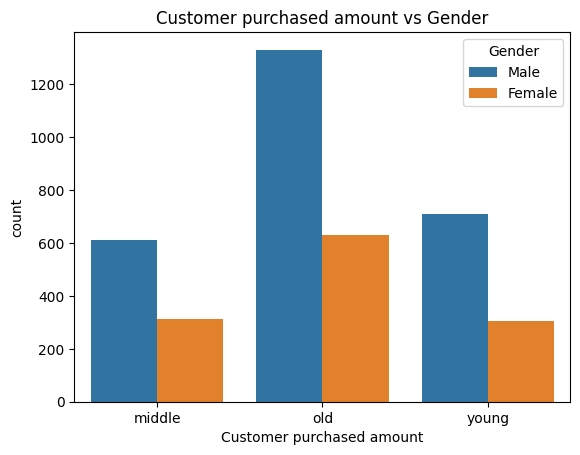

In [95]:
df = shop_trnds
def customer_classification_by_age(x: int):
    """Splits cusomers into 3 groups based on the purchased amount in USD"""
    if x <= 39:
        return 'young'
    elif x <= 59:
        return 'middle'
    else:
        return 'old'

df['Customer purchased amount'] = df['Purchase Amount (USD)'].apply(customer_classification_by_age).sort_values(ascending=False)
sns.countplot(data=df, x='Customer purchased amount', hue='Gender')
plt.title('Customer purchased amount vs Gender')
plt.show()


**Region Classification**

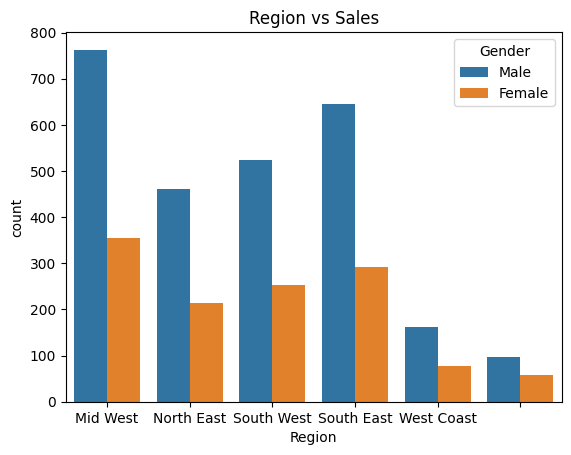

In [96]:
def region_classification_by_states():
  northeast = ["Connecticut","Maine","Massachusetts","New Hampshire", "Rhode Island", "Vermont", "New York", "New Jersey", "Pennsylvania"]
  southeast = ["Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"]
  midwest =   ["Alabama", "Arkansas", "Delaware", "Florida", "Georgia", "Kentucky", "Louisiana", "Maryland", "Mississippi", "North Carolina", "Oklahoma", "South Carolina", "Tennessee", "Texas, Virginia", "West Virginia"]
  southwest = ["Arizona", "Colorado", "Hawaii", "Idaho", "Montana", "Nevada", "New Mexico", "Oregon", "Utah", "Wyoming"]
  westcoast = ["Alaska", "California", "Hawaii", "Oregon", "Washington"]

  df = shop_trnds
  df['Region'] = ''
  df.loc[df['Location'].isin(westcoast), 'Region'] = 'West Coast'
  df.loc[df['Location'].isin(northeast), 'Region'] = 'North East'
  df.loc[df['Location'].isin(midwest), 'Region'] = 'Mid West'
  df.loc[df['Location'].isin(southeast), 'Region'] = 'South East'
  df.loc[df['Location'].isin(southwest), 'Region'] = 'South West'
  df['Region'].fillna('Other', inplace=True)
  return df

df = region_classification_by_states()
sns.countplot(data=df, x='Region', hue='Gender')
plt.title('Region vs Sales')
plt.show()



**Age Distribution Histogram with Density Curve**

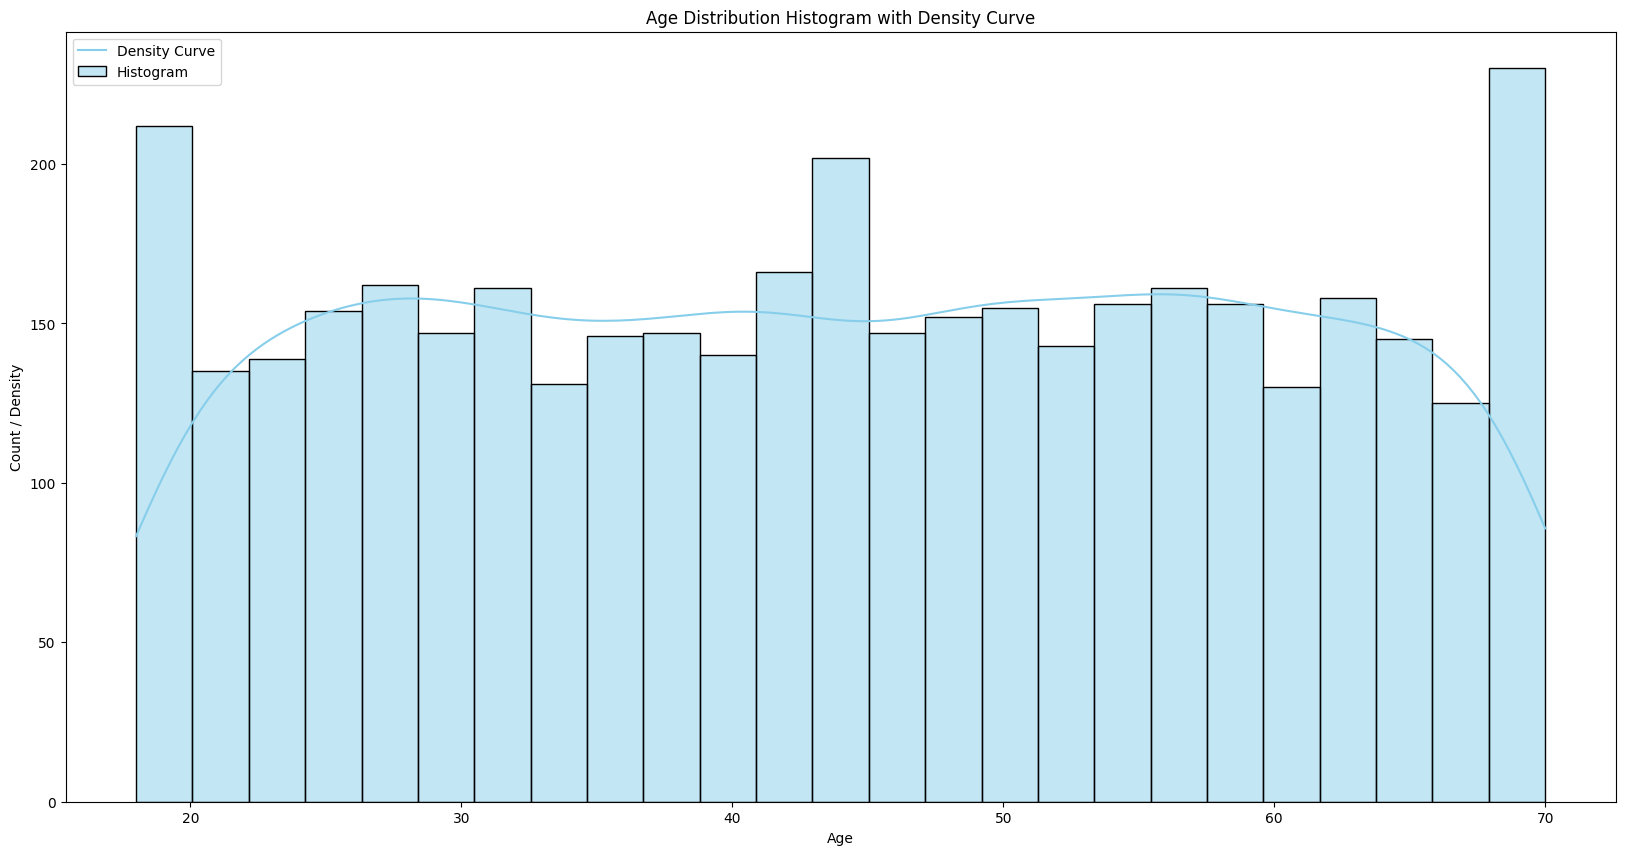

In [97]:
# Create a figure and axis using Seaborn
df = shop_trnds
fig, ax = plt.subplots(figsize=(20, 10))

# Create a histogram using Seaborn
sns.histplot(df['Age'], bins=25, kde=True, color='skyblue', ax=ax)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')

# Add legend
ax.legend(['Density Curve', 'Histogram'])

# Show the plot
plt.show()


# **Regression**

**Logistic Regression**

Accuracy: 0.5397435897435897

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.41      0.48       408
           1       0.51      0.68      0.59       372

    accuracy                           0.54       780
   macro avg       0.55      0.55      0.53       780
weighted avg       0.55      0.54      0.53       780



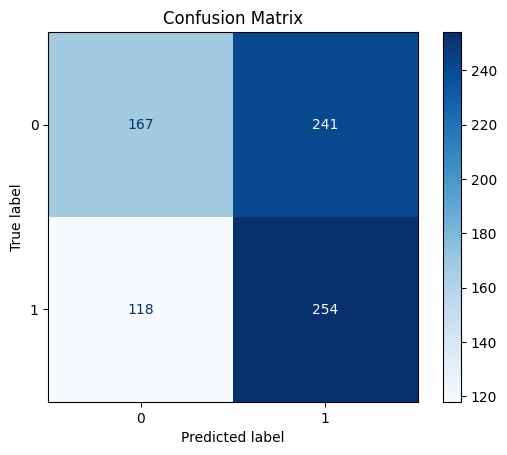

In [98]:
# Calculate the average purchase amount
average_purchase = shop_trnds['Purchase Amount (USD)'].mean()

# Create a binary target variable
shop_trnds['Above Average Purchase'] = (shop_trnds['Purchase Amount (USD)'] > average_purchase).astype(int)

# Select features for the model (example)
features = ['Age', 'Review Rating']
X = shop_trnds[features]
y = shop_trnds['Above Average Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize Data
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

**Linear Regression**

In [99]:
df = shop_trnds

df = df.dropna(subset=['Purchase Amount (USD)'])
fig = px.line(df.groupby('Purchase Amount (USD)').size().reset_index(name='Count'),
              x='Purchase Amount (USD)', y='Count',
              markers=True, line_shape='linear', title='Counts of Purchase Amount (USD)')
fig.update_layout(xaxis_title='Purchase Amount (USD)', yaxis_title='Sales')
fig.show()

**Multiple variable interactions**

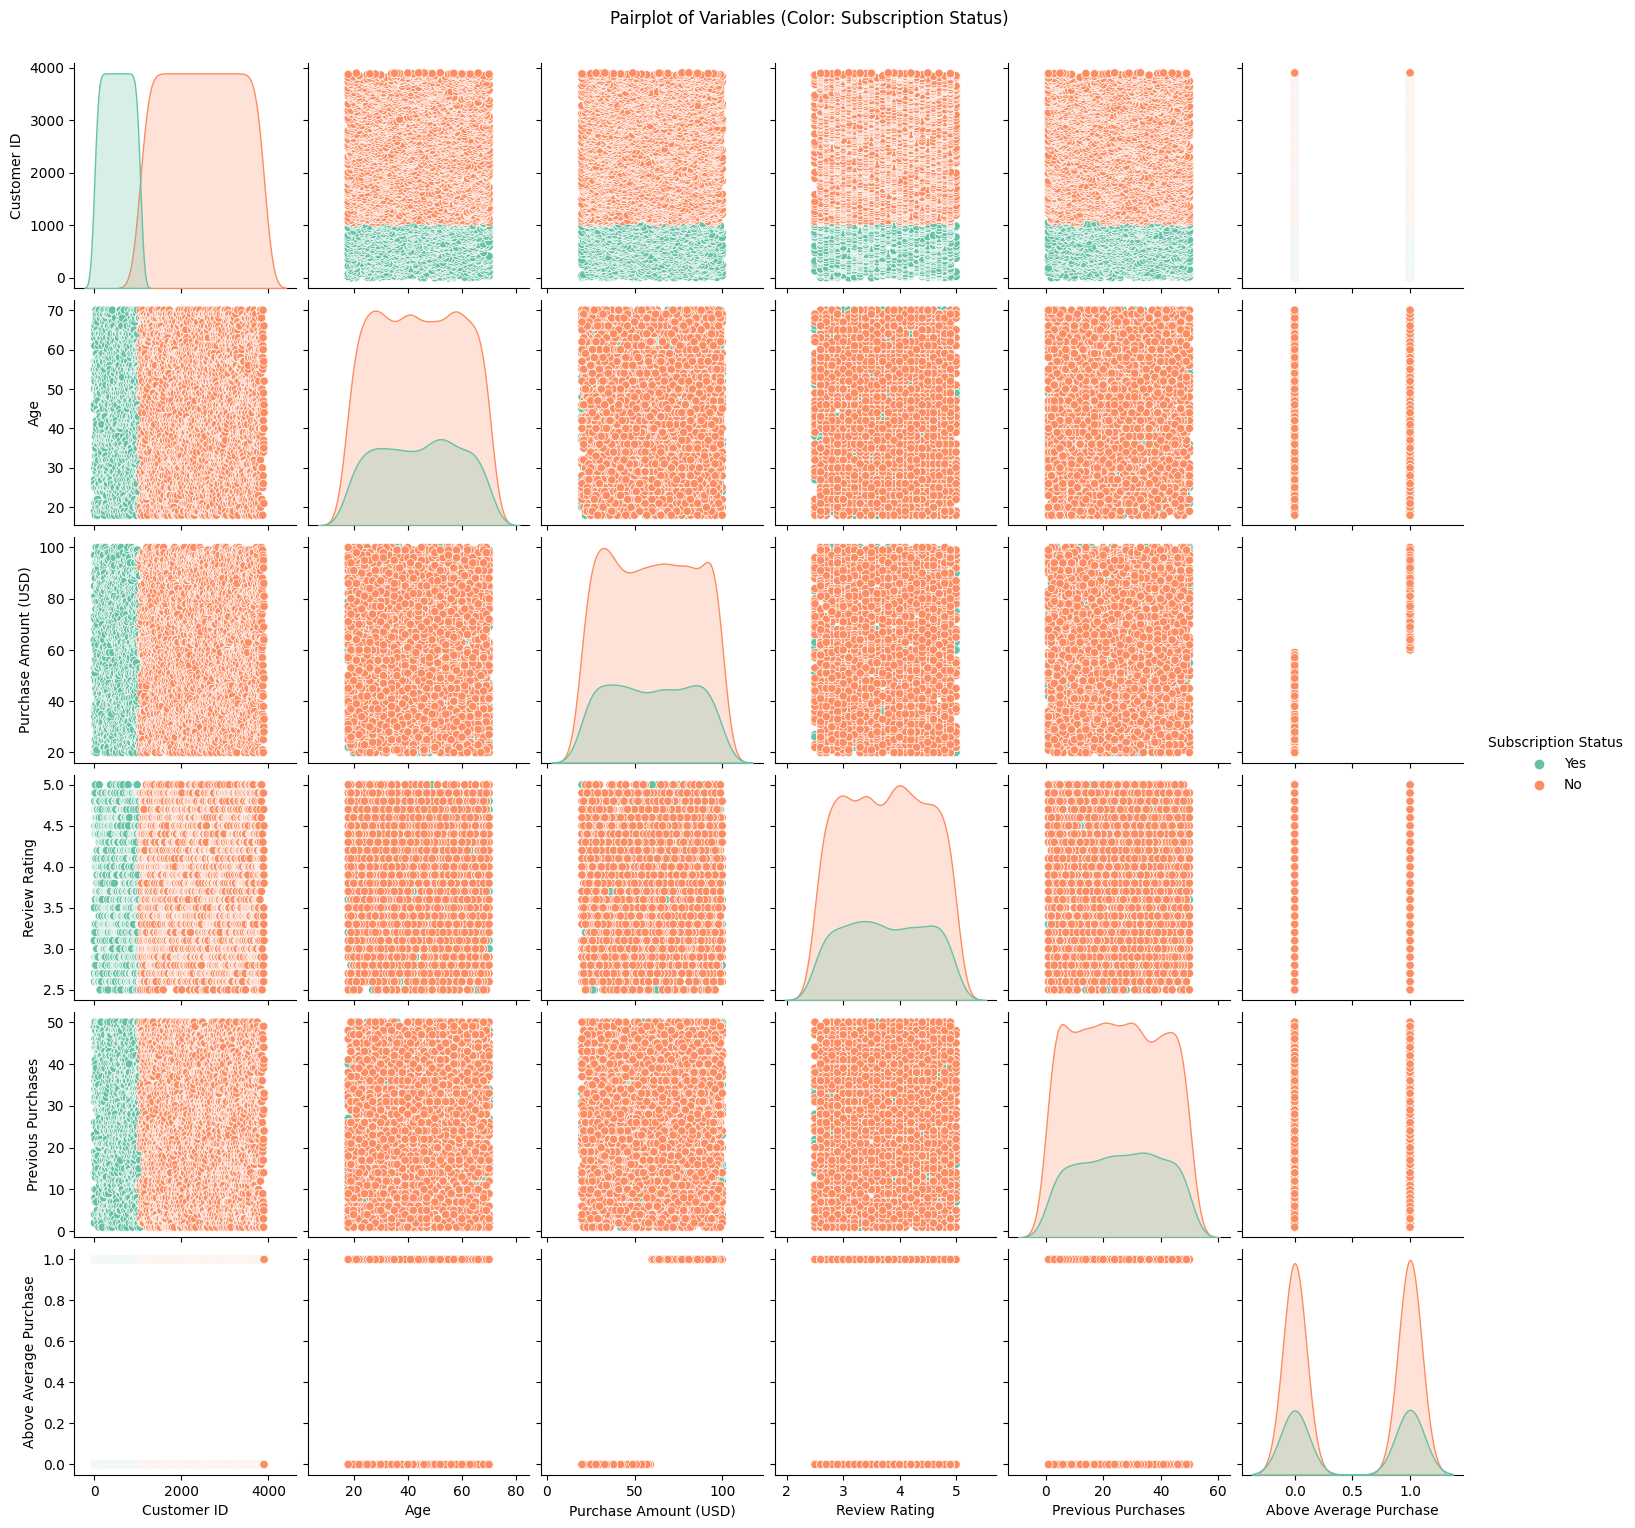

In [100]:
# Pairplot for multiple variable interactions
data = shop_trnds
sns.pairplot(data, hue='Subscription Status', palette='Set2')
plt.suptitle('Pairplot of Variables (Color: Subscription Status)', y=1.02)
plt.show()

**Calculating The Correlation Matrix**

['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Above Average Purchase']


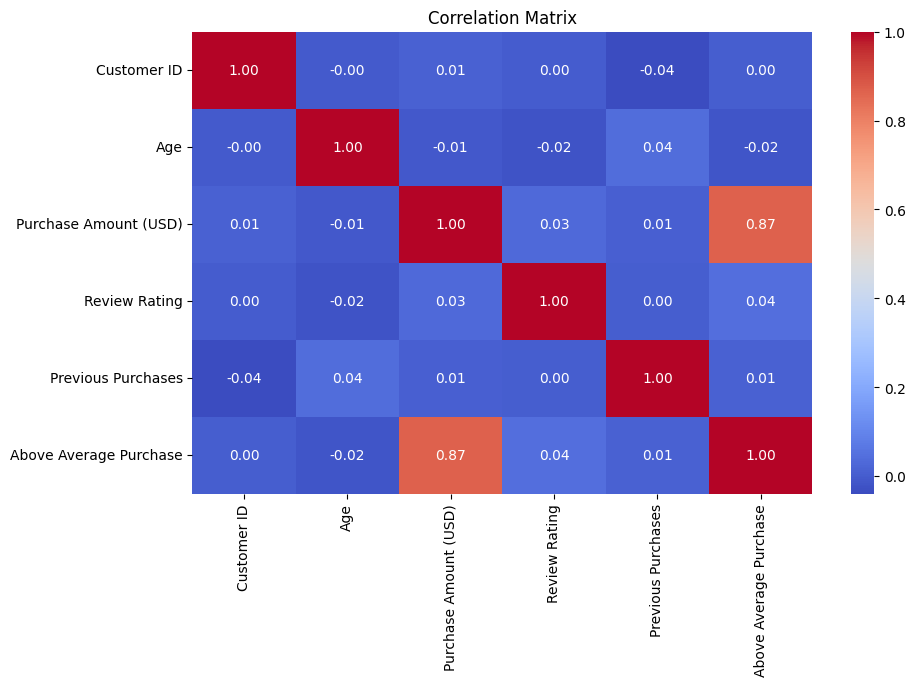

In [101]:
# Calculating the correlation matrix
data = shop_trnds
num_col = [col for col in data.columns if data[col].dtype != 'object']
print(num_col)

# Calculating the correlation matrix
correlation_matrix = data[num_col].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Customer Lifetime Value (CLV) Prediction**

Customer Lifetime Value Prediction - Mean Squared Error: 115948.83871976743


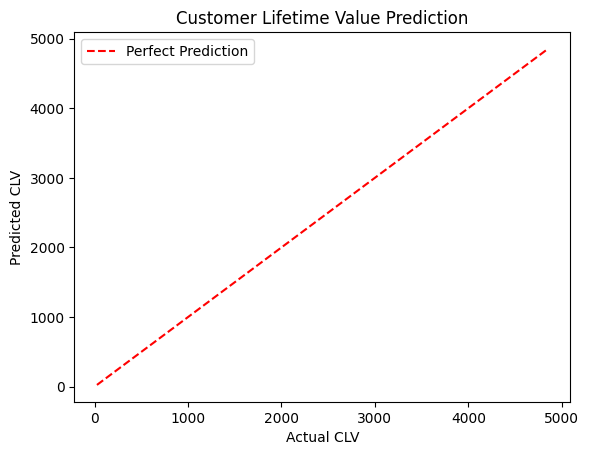

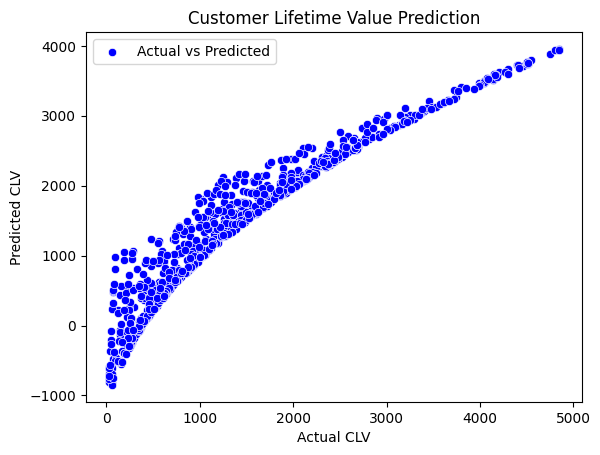

In [102]:
# Customer Lifetime Value Prediction
df = shop_trnds

# Select relevant features for CLV prediction
clv_features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Calculate CLV
df['Simulated_CLV'] = df['Purchase Amount (USD)'] * df['Previous Purchases']

# Target Variable
clv_target = 'Simulated_CLV'

# Split the data into training and testing sets
X_clv_train, X_clv_test, y_clv_train, y_clv_test = train_test_split(df[clv_features], df[clv_target], test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_clv_train, y_clv_train)


# Polynomial Regression
poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(X_clv_train)
X_poly_test = poly_reg.transform(X_clv_test)

linear_reg_poly = LinearRegression()
linear_reg_poly.fit(X_poly_train, y_clv_train)

# Decision Trees
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_clv_train, y_clv_train)

# Random Forest Regression
random_forest = RandomForestRegressor()
random_forest.fit(X_clv_train, y_clv_train)

# Gradient Boosting Regression (XGBoost)
xgb = XGBRegressor()
xgb.fit(X_clv_train, y_clv_train)

y_clv_pred = linear_reg.predict(X_clv_test)
mse_clv = mean_squared_error(y_clv_test, y_clv_pred)
print(f"Customer Lifetime Value Prediction - Mean Squared Error: {mse_clv}")

# Visualize the predicted vs actual values


plt.plot([min(y_clv_test), max(y_clv_test)], [min(y_clv_test), max(y_clv_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Customer Lifetime Value Prediction')
plt.legend()
plt.show()

sns.scatterplot(x=y_clv_test, y=y_clv_pred, color='blue', label='Actual vs Predicted')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Customer Lifetime Value Prediction')
plt.legend()
plt.show()

**Predictive & Other Procurement Analytics Insight (A/B Testing)**

Fail to reject the null hypothesis. There is no significant difference between groups A and B.


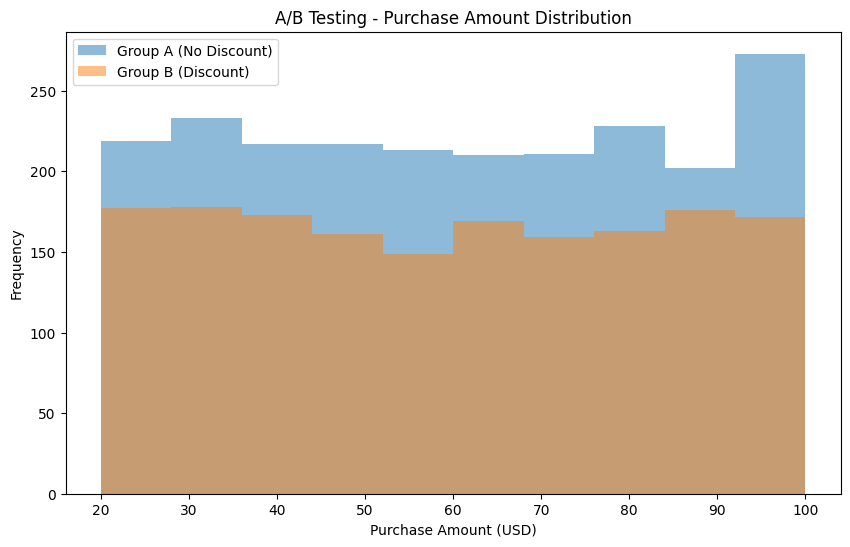

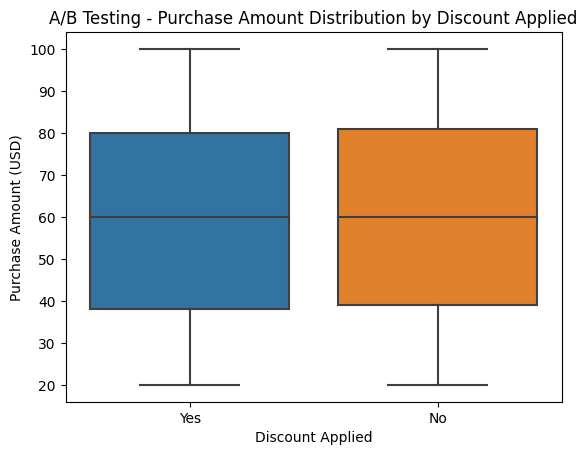

In [103]:
# A/B Testing

df = shop_trnds
group_A = df[df['Discount Applied'] == 'No']['Purchase Amount (USD)']
group_B = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)']

statistic, p_value = stats.ttest_ind(group_A, group_B)

alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis. There is a significant difference between groups A and B.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between groups A and B.")

# Visualize the distribution of purchase amounts for each group
plt.figure(figsize=(10, 6))
plt.hist(group_A, alpha=0.5, label='Group A (No Discount)')
plt.hist(group_B, alpha=0.5, label='Group B (Discount)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.title('A/B Testing - Purchase Amount Distribution')
plt.show()

sn.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=df)
plt.xlabel('Discount Applied')
plt.ylabel('Purchase Amount (USD)')
plt.title('A/B Testing - Purchase Amount Distribution by Discount Applied')
plt.show()



# **Let's find out some interesting facts**

Show me a list of male folks who purchased Pants from Alabama state in Summers Season

In [104]:
df = shop_trnds
males_pants = df[(df['Gender']=='Male') & (df['Item Purchased']=='Pants') & (df['Location']=='Alabama') & (df['Season']=='Summer')]
males_pants = males_pants[['Customer ID', 'Category', 'Purchase Amount (USD)', 'Payment Method', 'Shipping Type']]
males_pants = males_pants.sort_values(by='Purchase Amount (USD)', ascending=False)
males_pants = males_pants.head(10)
print(males_pants)


     Customer ID  Category  Purchase Amount (USD) Payment Method  \
793          794  Clothing                     35    Credit Card   

     Shipping Type  
793  Free Shipping  


Show me a list of female folks who purchased Sweater in Winter season from California state

In [105]:
df = shop_trnds
females_sweater = df[(df['Gender']=='Female') & (df['Item Purchased']=='Sweater') & (df['Location']=='California') & (df['Season']=='Winter')]
females_sweater = females_sweater[['Customer ID', 'Category', 'Purchase Amount (USD)', 'Payment Method', 'Shipping Type']]
females_sweater = females_sweater.sort_values(by='Purchase Amount (USD)', ascending=False)
females_sweater = females_sweater.head(10)
print(females_sweater)

      Customer ID  Category  Purchase Amount (USD) Payment Method  \
3845         3846  Clothing                     52          Venmo   
3363         3364  Clothing                     23  Bank Transfer   

     Shipping Type  
3845      Standard  
3363  Next Day Air  


Show me a list of top 5 states where people loved to apply discount and they are recurring customers.

In [106]:
df = shop_trnds
discount_applied = df[ (df['Discount Applied']=='Yes') & (df['Subscription Status']=='Yes')]
discount_applied = discount_applied.groupby('Location').size().reset_index(name='Count')
discount_applied = discount_applied.sort_values(by='Count', ascending=False)
discount_applied = discount_applied.head(5)
print(discount_applied)

          Location  Count
27          Nevada     30
4       California     29
47   West Virginia     28
7         Delaware     28
39  South Carolina     27


# **Did you enjoy and would like to discuss, suggest, recommend or work with me, please feel free to comment or drop me an email commercewitpk@gmail.com**